### Importing Analysis Releted Packages

In [1]:

import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
import matplotlib.pyplot as plt
import seaborn as sns
import re

### Read dataset into DataFrame

In [2]:

cr_df = pd.read_excel('customer_retention_dataset.xlsx',sheet_name='datasheet')
cr_df.head(5)

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer 

### Going To replace column names so that it will be wasy to visualise and it will usable

In [3]:

def replace_column_names(data):
    """
    It replaces the column names in order to access it easily
    it works on detailed sheet and codesheet alone.
    """
    columns = list(data.columns)
    
    for col in columns:
        pos = columns.index(col)
        if pos == 0:
            data.rename(columns = {'1Gender of respondent' : 'Gender'}, inplace = True)
        elif pos == 1:
            data.rename(columns = {'2 How old are you? ' : 'age'}, inplace = True)
        elif pos == 2:
            data.rename(columns = {'3 Which city do you shop online from?': 'City'}, inplace = True)
        elif pos == 3:
            data.rename(columns = {'4 What is the Pin Code of where you shop online from?' : 'Pin code'}, inplace = True)
        elif pos == 4:
            data.rename(columns = {'5 Since How Long You are Shopping Online ?': 'shopping since'}, inplace = True)
        elif pos == 5:
            data.rename(columns = {'6 How many times you have made an online purchase in the past 1 year?': 'shop_past_1_year'}, inplace = True)
        elif pos == 6:
            data.rename(columns = {'7 How do you access the internet while shopping on-line?' : 'access_internet'}, inplace = True)
        elif pos == 7:
            data.rename(columns = {'8 Which device do you use to access the online shopping?': 'Device'}, inplace = True)
        elif pos == 8:
            data.rename(columns = {'9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ': 'Screen_size'}, inplace = True)
        elif pos == 9:
            data.rename(columns = {'10 What is the operating system (OS) of your device?\t\t\t\t                                          ':'OS'},inplace = True)
        elif pos == 10:
            data.rename(columns = {'11 What browser do you run on your device to access the website?\t\t\t                                                          ': 'Browser'},inplace = True)
        elif pos == 11:
            data.rename(columns = {'12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ': 'channel_1_time'}, inplace = True)
        elif pos == 12:
            data.rename(columns = {'13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ':'channel_after_1_time'}, inplace = True)
        elif pos == 13:
            data.rename(columns = {'14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ':'time_spent_bfore_deci'}, inplace = True)
        elif pos == 14:
            data.rename(columns = {'15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               ': 'Payment_opt'}, inplace = True)
        elif pos == 15:
            data.rename(columns = {'16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ': 'leav_witout_payin'}, inplace = True)
        elif pos == 16:
            data.rename(columns = {'17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       ':'Reason_abondon'},inplace = True)
        elif pos == 17:
            data.rename(columns = {'18 The content on the website must be easy to read and understand': 'content_understanding'}, inplace = True)
        elif pos == 18:
            data.rename(columns = {'19 Information on similar product to the one highlighted  is important for product comparison': 'prod_comparison_info'}, inplace = True)
        elif pos == 19:
            data.rename(columns = {'20 Complete information on listed seller and product being offered is important for purchase decision.': 'Comp_info_liseller'}, inplace = True)
        elif pos == 20:
            data.rename(columns = {'21 All relevant information on listed products must be stated clearly':'relevant_prod_info'},inplace = True)
        elif pos == 21:
            data.rename(columns = {'22 Ease of navigation in website':'web_nav'}, inplace = True)
        elif pos == 22:
            data.rename(columns = {'23 Loading and processing speed': 'load_speed'}, inplace = True)
        elif pos == 23:
            data.rename(columns = {'24 User friendly Interface of the website':'interface'}, inplace = True)
        elif pos == 24:
            data.rename(columns = {'25 Convenient Payment methods': 'paying_method'}, inplace = True)
        elif pos == 25:
            data.rename(columns = {'26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time':'Trust_on_transac'}, inplace = True)
        elif pos == 26:
            data.rename(columns = {'27 Empathy (readiness to assist with queries) towards the customers': 'empathy_assist_queries'},inplace = True)
        elif pos == 27:
            data.rename(columns = {'28 Being able to guarantee the privacy of the customer': 'Privacy_customer'}, inplace = True)
        elif pos == 28:
            data.rename(columns = {'29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)':'Responsive_comm'}, inplace = True)
        elif pos == 29:
            data.rename(columns = {'30 Online shopping gives monetary benefit and discounts':'benefits_discounts'}, inplace = True)
        elif pos == 30:
            data.rename(columns = {'31 Enjoyment is derived from shopping online': 'Enjy_shop_online'}, inplace = True)
        elif pos == 31:
            data.rename(columns = {'32 Shopping online is convenient and flexible':'Conv_flexi'},inplace = True)
        elif pos == 32:
            data.rename(columns = {'33 Return and replacement policy of the e-tailer is important for purchase decision': 'replace_policy_imp'},inplace = True)
        elif pos == 33:
            data.rename(columns = {'34 Gaining access to loyalty programs is a benefit of shopping online': 'loyality_prog'},inplace = True)
        elif pos == 34:
            data.rename(columns = {'35 Displaying quality Information on the website improves satisfaction of customers':'qual_info'}, inplace = True)
        elif pos == 35:
            data.rename(columns = {'36 User derive satisfaction while shopping on a good quality website or application':'website_quality'}, inplace = True)
        elif pos == 36:
            data.rename(columns = {'37 Net Benefit derived from shopping online can lead to users satisfaction':'Net_benf'}, inplace = True)
        elif pos == 37:
            data.rename(columns = {'38 User satisfaction cannot exist without trust' : 'trust'}, inplace = True)
        elif pos == 38:
            data.rename(columns = {'39 Offering a wide variety of listed product in several category':'wide_var_prod'}, inplace = True)
        elif pos == 39:
            data.rename(columns = {'40 Provision of complete and relevant product information':'Prov_prod_info'}, inplace = True)
        elif pos == 40:
            data.rename(columns = {'41 Monetary savings': 'Money_savings'}, inplace = True)
        elif pos == 41:
            data.rename(columns = {'42 The Convenience of patronizing the online retailer':'con_pat_retlr'}, inplace = True)
        elif pos == 42:
            data.rename(columns = {'43 Shopping on the website gives you the sense of adventure':'sense_adven_shopon'}, inplace = True)
        elif pos == 43:
            data.rename(columns = {'44 Shopping on your preferred e-tailer enhances your social status':'social_status'}, inplace = True)
        elif pos == 44:
            data.rename(columns = {'45 You feel gratification shopping on your favorite e-tailer': 'gratification'}, inplace = True)
        elif pos == 45:
            data.rename(columns = {'46 Shopping on the website helps you fulfill certain roles':'fullfill_roles'}, inplace = True)
        elif pos == 46:
            data.rename(columns = {'47 Getting value for money spent':'value_for_money'}, inplace = True)
        elif pos == 47:
            data.rename(columns = {'From the following, tick any (or all) of the online retailers you have shopped from;                                                                           ':'onlin_reatl_shp_frm'}, inplace = True)
        elif pos == 48:
            data.rename(columns = {'Easy to use website or application':'easy_use_app'}, inplace = True)
        elif pos == 49:
            data.rename(columns = {'Visual appealing web-page layout':'vis_web_layout'}, inplace = True)
        elif pos == 50:
            data.rename(columns = {'Wild variety of product on offer':'var_prod_off'}, inplace = True)
        elif pos == 51:
            data.rename(columns = {'Complete, relevant description information of products':'desc_info_prods'}, inplace = True)
        elif pos == 52:
            data.rename(columns = {'Fast loading website speed of website and application':'fast_load'}, inplace =True)
        elif pos == 53:
            data.rename(columns = {'Reliability of the website or application':'reliab_web'}, inplace = True)
        elif pos == 54:
            data.rename(columns = {'Quickness to complete purchase':'Quick_comp'}, inplace = True)
        elif pos == 55:
            data.rename(columns = {'Availability of several payment options':'Avail_pay_opt'}, inplace = True)
        elif pos == 56:
            data.rename(columns = {'Speedy order delivery ':'speed_odr_del'}, inplace = True)
        elif pos == 57:
            data.rename(columns = {'Privacy of customers’ information': 'pri_cust_info'}, inplace = True)
        elif pos == 58:
            data.rename(columns = {'Security of customer financial information':'sec_cust_fin_info'}, inplace = True)
        elif pos == 59:
            data.rename(columns = {'Perceived Trustworthiness':'perceived_trust'}, inplace = True)
        elif pos == 60:
            data.rename(columns = {'Presence of online assistance through multi-channel':'pre_onlin_assist'}, inplace = True)
        elif pos == 61:
            data.rename(columns = {'Longer time to get logged in (promotion, sales period)':'lon_tim_to_login'}, inplace = True)
        elif pos == 62:
            data.rename(columns = {'Longer time in displaying graphics and photos (promotion, sales period)':'lon_tim_disp_graphics'}, inplace = True)
        elif pos == 63:
            data.rename(columns = {'Late declaration of price (promotion, sales period)':'lat_dec_price'}, inplace = True)
        elif pos == 64:
            data.rename(columns = {'Longer page loading time (promotion, sales period)':'lon_page_load_tim'}, inplace = True)
        elif pos == 65:
            data.rename(columns = {'Limited mode of payment on most products (promotion, sales period)':'lim_mod_pay'}, inplace = True)
        elif pos == 66:
            data.rename(columns = {'Longer delivery period':'lon_del_period'}, inplace = True)
        elif pos == 67:
            data.rename(columns = {'Change in website/Application design':'chng_in_app_des'}, inplace = True)
        elif pos == 68:
            data.rename(columns = {'Frequent disruption when moving from one page to another':'dirupt_frm_pag_mov'}, inplace = True)
        elif pos == 69:
            data.rename(columns = {'Website is as efficient as before':'web_is_eff_bfre'}, inplace = True)
        else:
            data.rename(columns = {'Which of the Indian online retailer would you recommend to a friend?':'recommend'}, inplace = True)
    return data

In [4]:
#calling the function on the dataset for rename the column
cr_df = replace_column_names(cr_df)
cr_df.head()

,Gender,age,City,Pin code,shopping since,shop_past_1_year,access_internet,Device,Screen_size,OS,Browser,channel_1_time,channel_after_1_time,time_spent_bfore_deci,Payment_opt,leav_witout_payin,Reason_abondon,content_understanding,prod_comparison_info,Comp_info_liseller,relevant_prod_info,web_nav,load_speed,interface,paying_method,Trust_on_transac,empathy_assist_queries,Privacy_customer,Responsive_comm,benefits_discounts,Enjy_shop_online,Conv_flexi,replace_policy_imp,loyality_prog,qual_info,website_quality,Net_benf,trust,wide_var_prod,Prov_prod_info,Money_savings,con_pat_retlr,sense_adven_shopon,social_status,gratification,fullfill_roles,value_for_money,onlin_reatl_shp_frm,easy_use_app,vis_web_layout,var_prod_off,desc_info_prods,fast_load,reliab_web,Quick_comp,Avail_pay_opt,speed_odr_del,pri_cust_info,sec_cust_fin_info,perceived_trust,pre_onlin_assist,lon_tim_to_login,lon_tim_disp_graphics,lat_dec_price,lon_page_load_tim,lim_mod_pay,lon_del_period,chng_in_app_des,dirupt_frm_pag_mov,web_is_eff_bfre,recommend
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,Google chrome,Search Engine,Search Engine,6-10 mins,"E-wallets (Paytm, Freecharge etc.)",Sometimes,Lack of trust,Agree (4),Indifferent (3),Indifferent (3),Agree (4),Agree (4),Strongly disagree (1),Dis-agree (2),Dis-agree (2),Disagree (2),Strongly agree (5),Agree (4),Agree (4),indifferent (3),Strongly disagree (1),Dis-agree (2),Dis-agree (2),Agree (4),indifferent (3),Strongly agree (5),Agree (4),Strongly agree (5),indifferent (3),indifferent (3),Disagree (2),indifferent (3),Agree (4),Agree (4),Strongly agree (5),Agree (4),Strongly agree (5),"Amazon.in, Paytm.com",Paytm.com,Flipkart.com,Flipkart.com,Snapdeal.com,Snapdeal.com,Paytm.com,Paytm.com,Patym.com,Amazon.in,Amazon.in,Amazon.in,Flipkart.com,Paytm.com,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,Google chrome,Search Engine,Via application,more than 15 mins,Credit/Debit cards,Very frequently,Promo code not applicable,Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),indifferent (3),indifferent (3),indifferent (3),Strongly agree (5),Strongly agree (5),Strongly agree (5),"Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com","Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com","Amazon.in, Myntra.com","Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com",Myntra.com,"Amazon.com, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com",Myntra.com,Myntra.com,Myntra.com,"Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,Google chrome,Search Engine,Via application,11-15 mins,"E-wallets (Paytm, Freecharge etc.)",Sometimes,Promo code not applicable,Strongly agree (5),Agree (4),Agree (4),Agree (4),Agree (4),Agree (4),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Agree (4),Strongly agree (5),Strongly agree (5),Strongly agree (5),Agree (4),Agree (4),Agree (4),indifferen

### Now Going to check missing values

In [5]:
cr_df.isnull().sum()

Gender                    0
age                       0
City                      0
Pin code                  0
shopping since            0
shop_past_1_year          0
access_internet           0
Device                    0
Screen_size               0
OS                        0
Browser                   0
channel_1_time            0
channel_after_1_time      0
time_spent_bfore_deci     0
Payment_opt               0
leav_witout_payin         0
Reason_abondon            0
content_understanding     0
prod_comparison_info      0
Comp_info_liseller        0
relevant_prod_info        0
web_nav                   0
load_speed                0
interface                 0
paying_method             0
Trust_on_transac          0
empathy_assist_queries    0
Privacy_customer          0
Responsive_comm           0
benefits_discounts        0
Enjy_shop_online          0
Conv_flexi                0
replace_policy_imp        0
loyality_prog             0
qual_info                 0
website_quality     

### Observation: 

By above check there is no any null values

In [6]:
#checking data info

cr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  269 non-null    object
 1   age                     269 non-null    object
 2   City                    269 non-null    object
 3   Pin code                269 non-null    int64 
 4   shopping since          269 non-null    object
 5   shop_past_1_year        269 non-null    object
 6   access_internet         269 non-null    object
 7   Device                  269 non-null    object
 8   Screen_size             269 non-null    object
 9   OS                      269 non-null    object
 10  Browser                 269 non-null    object
 11  channel_1_time          269 non-null    object
 12  channel_after_1_time    269 non-null    object
 13  time_spent_bfore_deci   269 non-null    object
 14  Payment_opt             269 non-null    object
 15  leav_w

### Observation:
    
    ->Total 269 rows (0 to 268)
    ->Total columns 71 columns
    ->Only Pin Code is integer rmaining is Object type

## Going to check Unique values and count

In [7]:
for i in cr_df.columns:
    print("unique values for column {} are: \n\n{}".format(i,cr_df[i].value_counts()))
    print("*"*50)

unique values for column Gender are: 

Female    181
Male       88
Name: Gender, dtype: int64
**************************************************
unique values for column age are: 

31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: age, dtype: int64
**************************************************
unique values for column City are: 

Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: City, dtype: int64
**************************************************
unique values for column Pin code are: 

201308    38
132001    19
201310    18
110044    16
250001     9
173229     9
173212     9
560010     8
132036     8
122018     8
560037     8
110008     7
110011     7
201306     7
110014     6
110018     6
201305     5
201008     5
201009     

## Going to correct some Features

In [8]:

cr_df['access_internet'].replace('Mobile internet','Mobile Internet',inplace=True)
cr_df['access_internet'].replace('42 times and above','41 times and above',inplace=True)

## UNIVARIATE ANALYSIS

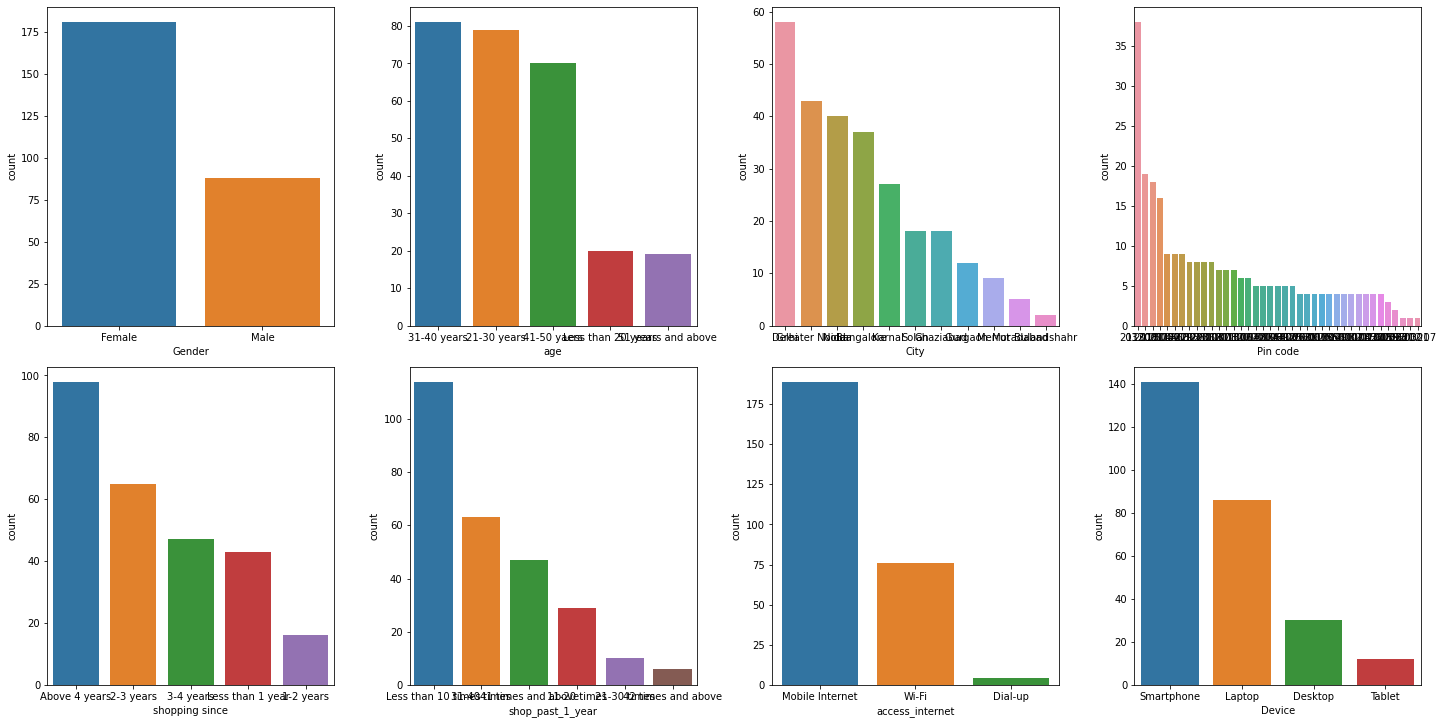

In [9]:
#plotting countplots as subplots for 1st 8 variables

fig, ax = plt.subplots(ncols=4 ,nrows=2 , figsize=(20,10))
index = 0
ax = ax.flatten()

for i,value in cr_df.iloc[:,np.arange(0,8)].items():
        sns.countplot(x=i, data=cr_df ,ax=ax[index],order=cr_df.iloc[:,np.arange(0,8)][i].value_counts().index)
        index += 1
plt.tight_layout(pad=0.5, h_pad= 1, w_pad= 0.6)
plt.show()

1. ***Genderof respondent*** - Here we can see that the number of female customers are more than of the males. Count of Female customers are more than 175 where male customers are ranging between 75-100.

2. ***Age of customer*** - we can see that the customer aged between 21 years to 50 years are more likely to shop online. 31-40 years shows the maximum number of shoppers followed by 21-30 and 41-50 years.

3. ***City*** - we can see that most of the online shopping is done in delhi followed by Greater Noida and Noida, Moradabad and Bulandshahr shows minimum online shopping customers.

4. ***Pin code*** - we can see that 201308 which is the Pin code of noida shows maximum online shopping customers, this is only if we compare with unique pin code otherwise Delhi has the most number of online customers.

5. ***Shopping duration*** - most of the customers are doing online shopping for more than 4 years.

6. ***Shopping in last 1 year*** - this shows that most of the customers shopped less than 10 times, the reason could be that they don't use online shopping for their basic needs like food, groceries. They use online shopping for the products which has high durability.

7. ***Internet access*** - customers usually use mobile internet the most for online shopping, the reason could be that using mobile app and mobile internet they can shop any where any time without having a wifi nearby.

8. ***Device for online shpping*** - Smartphone is most preferrable by the customers as it provides ease in navigation and more attractive , easy to use. However we can see that laptop and desktop are classified uniquely here, if we merge these two then count of the customer using these 2 devices will be closer to the count of the customers using smartphones.

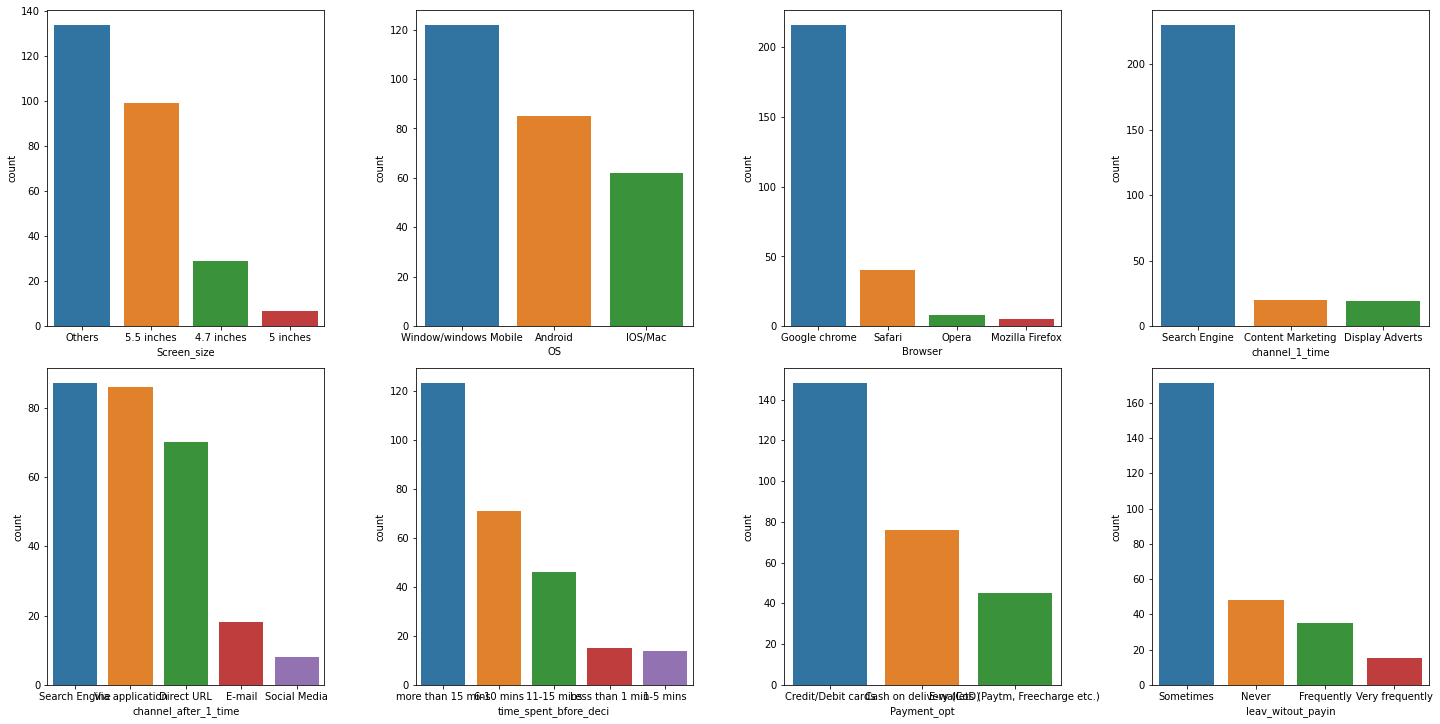

In [10]:
#plotting countplots as subplots for next 8 variables

fig, ax = plt.subplots(ncols=4 ,nrows=2 , figsize=(20,10))
index = 0
ax = ax.flatten()

for i,value in cr_df.iloc[:,np.arange(8,16)].items():
        sns.countplot(x=i, data=cr_df ,ax=ax[index],order=cr_df.iloc[:,np.arange(8,16)][i].value_counts().index)
        index += 1
plt.tight_layout(pad=0.5, h_pad= 1, w_pad= 0.6)
plt.show()

9. ***Screen size*** - 'Others' here denotes the size of laptop or computer as usually their screen size is more than 10 inches. Others shows the maximum count here followed by 5.5 inches.

10. ***OS type*** - windows shows the maximum count as this can inclue both smartphones and desktop/laptop. In India user base of android is more than of apple IOS that is why here we can see that android based customers are more than of the IOS.

11. ***Browser*** - Google chrome is the most widely used web browser across world, An estimated 2.65 billion internet users globally use Chrome as their primary browser. That is why our data also shows that the customers are more likely to use Google chrome while they search for things online and shop online

12. ***Channel*** - customer do online shopping using search engine as it will give them many options available.

13. ***Channel after 1 visit*** - most customers still goes for using search engine followed by app users.

14. ***explore time*** - most customers usually explore more than 15 mins, the time taken due to comparison of the product, reading product details, alternatives for the product chosen.

15. ***Preferred payment option*** - Credit cards and Debit cards are most widely use of payment metho , the reason is simple that on these payment mode customer gets many offer , some banks also partner with the online shopping site for the benefits of the customers.

16. ***abandon while shopping*** - most of the customer abandon the shopping cart, the reason could be that they find a better alternative, promo code isn't working, delivery of product takes too long etc

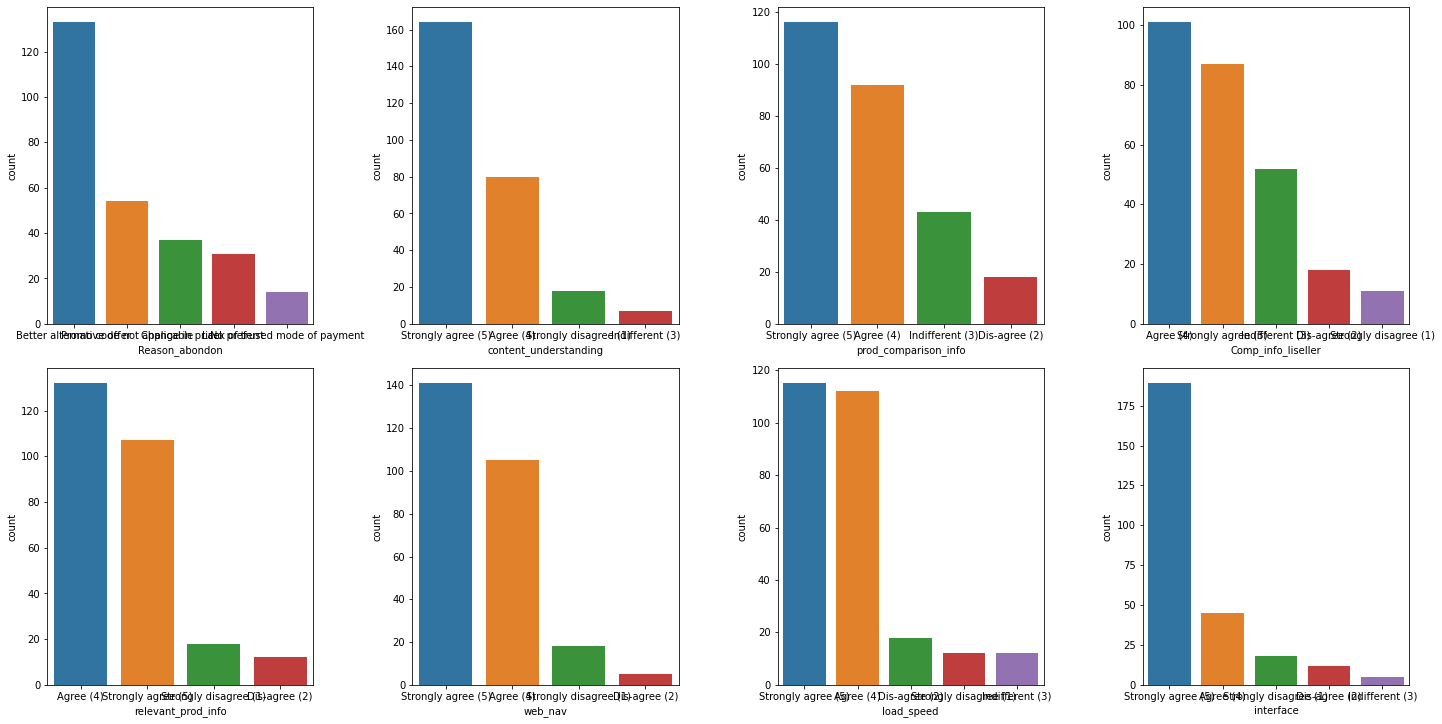

In [11]:
#plotting countplots as subplots for next 8 variables

fig, ax = plt.subplots(ncols=4 ,nrows=2 , figsize=(20,10))
index = 0
ax = ax.flatten()

for i,value in cr_df.iloc[:,np.arange(16,24)].items():
        sns.countplot(x=i, data=cr_df ,ax=ax[index],order=cr_df.iloc[:,np.arange(16,24)][i].value_counts().index)
        index += 1
plt.tight_layout(pad=0.5, h_pad= 1, w_pad= 0.6)
plt.show()

17. ***Abandoned cart reason*** - The most common reason for abandoning the cart is having a better alternative offer, and promo code not applicabe.

18. ***website content is easy?*** - Most customers agrees that the content on website is much easier to understand.

19. ***similar product information*** - most of the customers find the information of similar products useful for comparison.

20. ***complete product information*** - this affect the purchase decision of the customer, Most of the customer find this important while the do online shopping.

21. ***product information*** - most of the customers feels that listed product should have complete details of it. This will affect the purchase decision of the customer.

22. ***Navigation on website*** - Every customer wants to have easy navigation steps while doing online shopping.

23. ***Loading and processing speed*** - most of the customers feels that loading and processing speed also affect their purchase decision.

24. ***Interface of website*** - Most customers like having a good interface of the website, that attracts customers and affect their purchase decision.


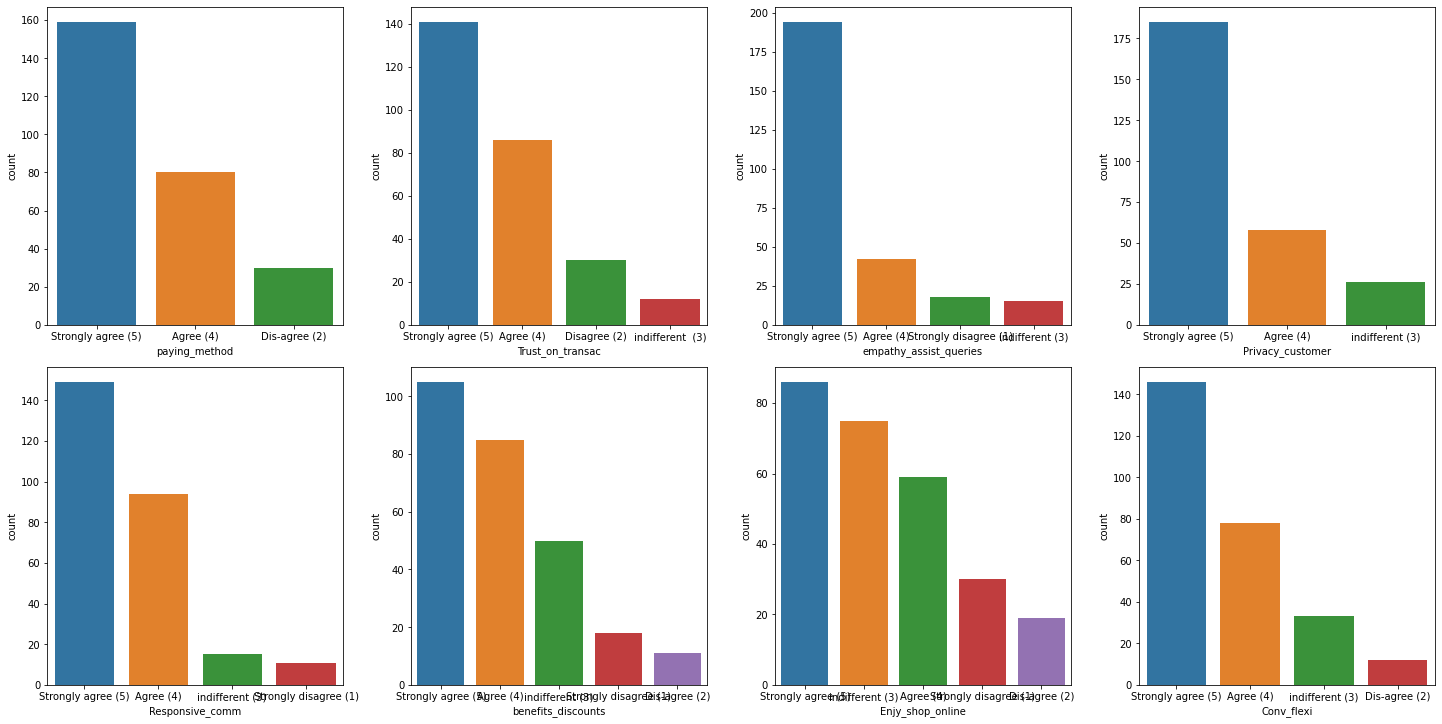

In [12]:
#plotting countplots as subplots for next 8 variables

fig, ax = plt.subplots(ncols=4 ,nrows=2 , figsize=(20,10))
index = 0
ax = ax.flatten()

for i,value in cr_df.iloc[:,np.arange(24,32)].items():
        sns.countplot(x=i, data=cr_df ,ax=ax[index],order=cr_df.iloc[:,np.arange(24,32)][i].value_counts().index)
        index += 1
plt.tight_layout(pad=0.5, h_pad= 1, w_pad= 0.6)
plt.show()

25. ***Payment convinience*** - most of the Customer (almost every) wants a convinient payment method.
26. ***Trust on online retail store*** - Most of the customers believes that the respective online retail store will full fill the transaction within given time by the merchant.
27. ***Empathy*** - bases on query solving on a particular site like amazon, flipkart it is very important to resolve the customer's query as this will affect the customer purchase decision in future
28. ***Data Privacy*** - This is becoming very important concern nowdays, as customer's details are very sensitive and customer will only provide data to those which have high data security., So most customers agree on this that there should be data security.
29. ***Cummunication channel*** - There are various communication channels available like email support, chat support, phone support etc, customer wants communication medium of their choice. They agree that the online store should have various communication channels available.
30. ***Benefits and discounts*** - Most of the customers agree that online shopping gives monetary discount and benefits, like cashback, reward points etc.
31. ***enjoyment*** - most of the customers like shopping online, it is hassle free and time consuming, however there are some customer's who don't like online shopping as much. However most of the customers agree that they enjoy doing shopping online.
31. ***flexibility and convinience*** - Online shopping is flexible and convinience, most of the customers  agree on that.

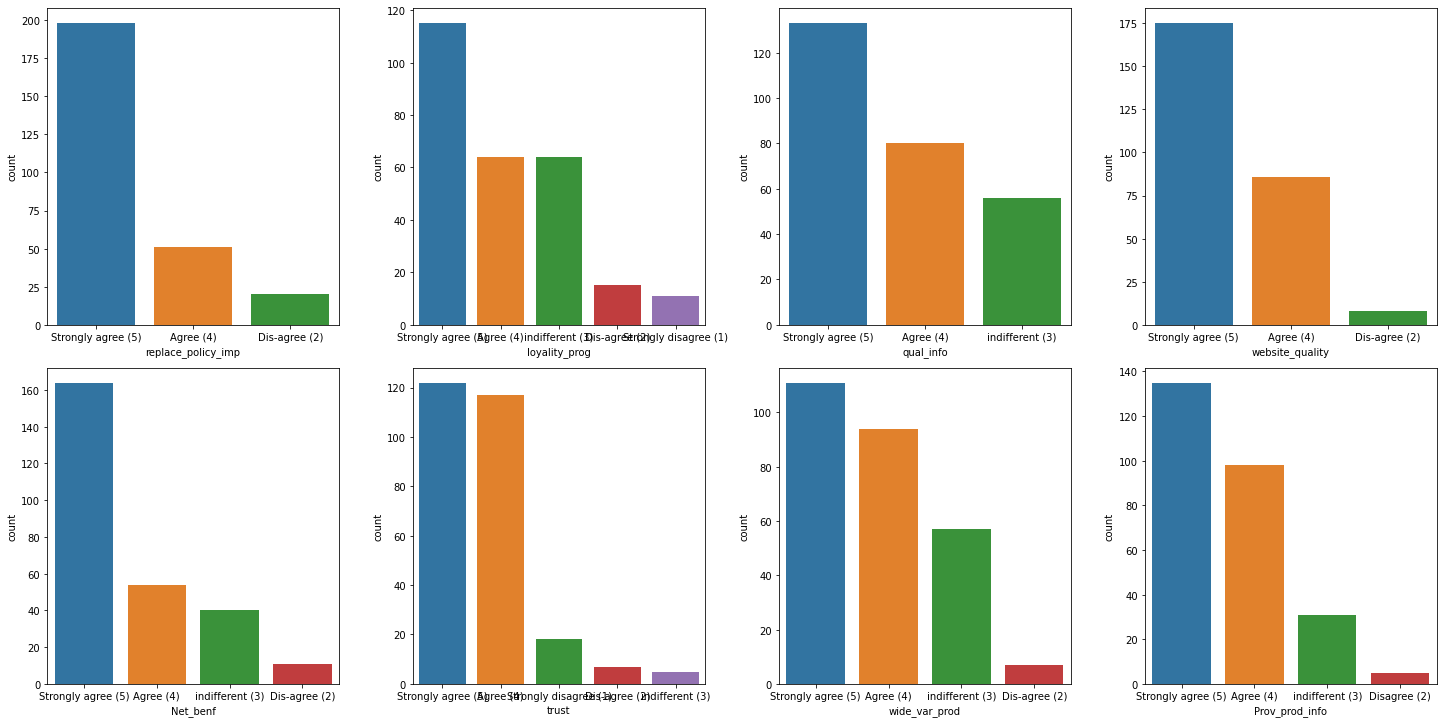

In [13]:
#plotting countplots as subplots for next 8 variables

fig, ax = plt.subplots(ncols=4 ,nrows=2 , figsize=(20,10))
index = 0
ax = ax.flatten()

for i,value in cr_df.iloc[:,np.arange(32,40)].items():
        sns.countplot(x=i, data=cr_df ,ax=ax[index],order=cr_df.iloc[:,np.arange(32,40)][i].value_counts().index)
        index += 1
plt.tight_layout(pad=0.5, h_pad= 1, w_pad= 0.6)
plt.show()

33. ***Return/replacment policy*** - most of the custumers agree on having return and replacment policy.
34. ***Loyalty programs*** - this refers to offers, rewards offered to customer so that the online retail store retain the customers. Example for this can be Flipkart's supercoin, where for every purchase you will earn some amount of supercoin that can be redeemed in future. Such policy attract customers and most of the customer's agree that some rewards option attract them.
35. ***quality information*** - Most of the customers find this important.
36. ***website/application quality*** - most of the customer's agree that a website or application quality should be good to retain the customers.
37. ***Net benefits*** - Most of the customer's agree on net benefits can lead to customer's satisfaction.
38. ***trust vs satisfaction*** - most of the customers agree on that trust results in customer's satisfaction.
39. ***variety of products*** - most of the customers agree on that online shopping shows wide variety of the products available.
40. ***relevant product info*** - most of the customers agree on this.

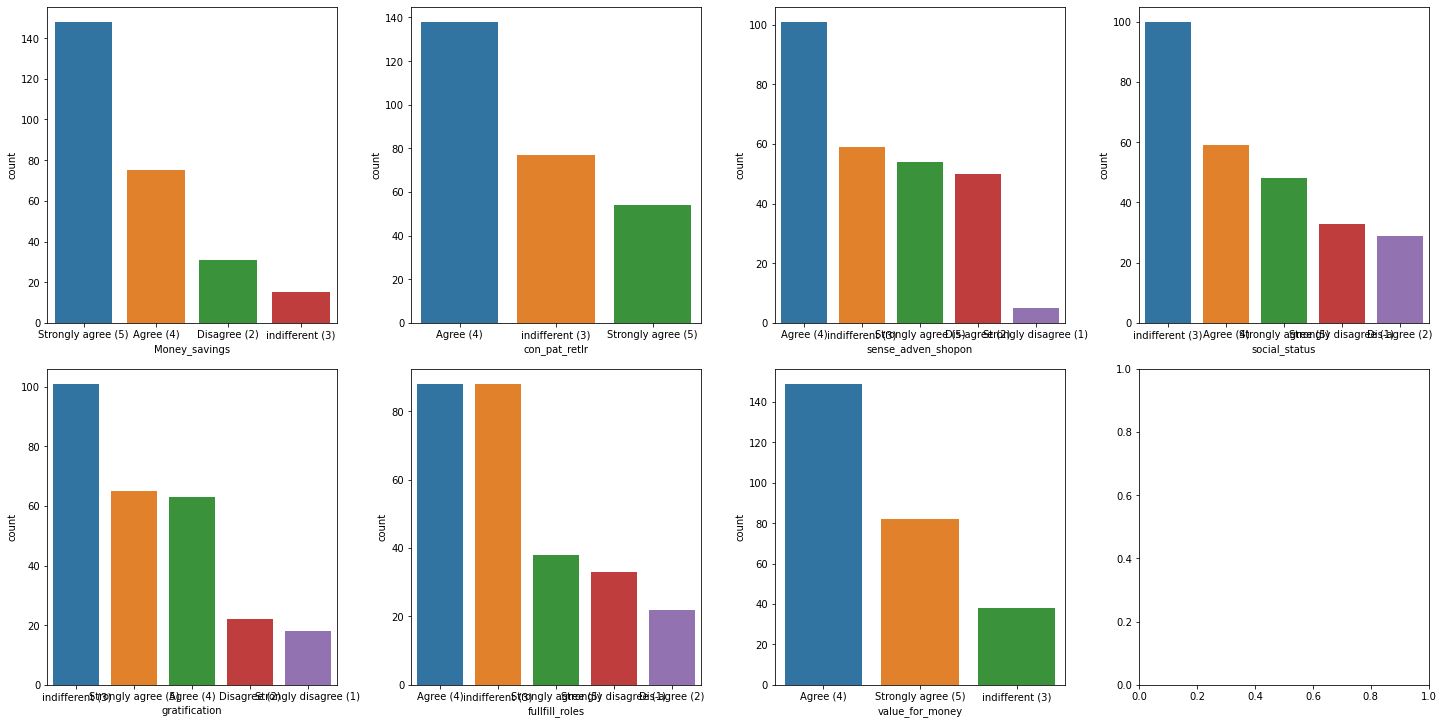

In [14]:
#plotting countplots as subplots for next 8 variables

fig, ax = plt.subplots(ncols=4 ,nrows=2 , figsize=(20,10))
index = 0
ax = ax.flatten()

for i,value in cr_df.iloc[:,np.arange(40,47)].items():
        sns.countplot(x=i, data=cr_df ,ax=ax[index],order=cr_df.iloc[:,np.arange(40,47)][i].value_counts().index)
        index += 1
plt.tight_layout(pad=0.5, h_pad= 1, w_pad= 0.6)

plt.show()

41. ***Monetary savings*** - most of the customers agree on that online shopping gives them monetary savings.
42. ***patronizing the online retailer*** - this means to provide support aid or offer to regular customers. Most of the customers agree on this.
43. ***experience*** - most of the customer stringly agree that they get a good experience when shopping online, however there are customers who are not sure and don't feel the same way.
44. ***Social status*** - most customers are indifferent in shopping online enhances their social status however there are also customers who disagree and agree on this.
45. ***Gratification*** - Customer satisfaction is defined as a measurement that determines how happy customers are with a company's products, services, and capabilities. Most of the customers are indifferent.
46. ***Website fullfilment*** - most of the customers agree and indifferent if the website fullfil their shopping exp.
47. ***Value for money*** - most of the customer agree on that they get great value for money by shopping online.

## Using crosstab/ contigency table I will analyze multiple variable at once

<AxesSubplot:xlabel='age'>

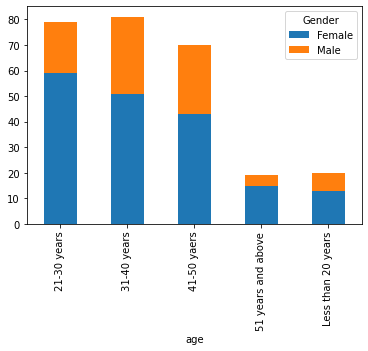

In [15]:
#checking the relation ship of Gender and their age
pd.crosstab(cr_df['age'],cr_df['Gender'])
pd.crosstab(cr_df['age'],cr_df['Gender']).plot(kind='bar',stacked=True)

### Observation:
    
    Here we can see that number of female customers in all age categories are more than of male, from age 21-30 years count of female customers is the most

<AxesSubplot:xlabel='City,Gender,age'>

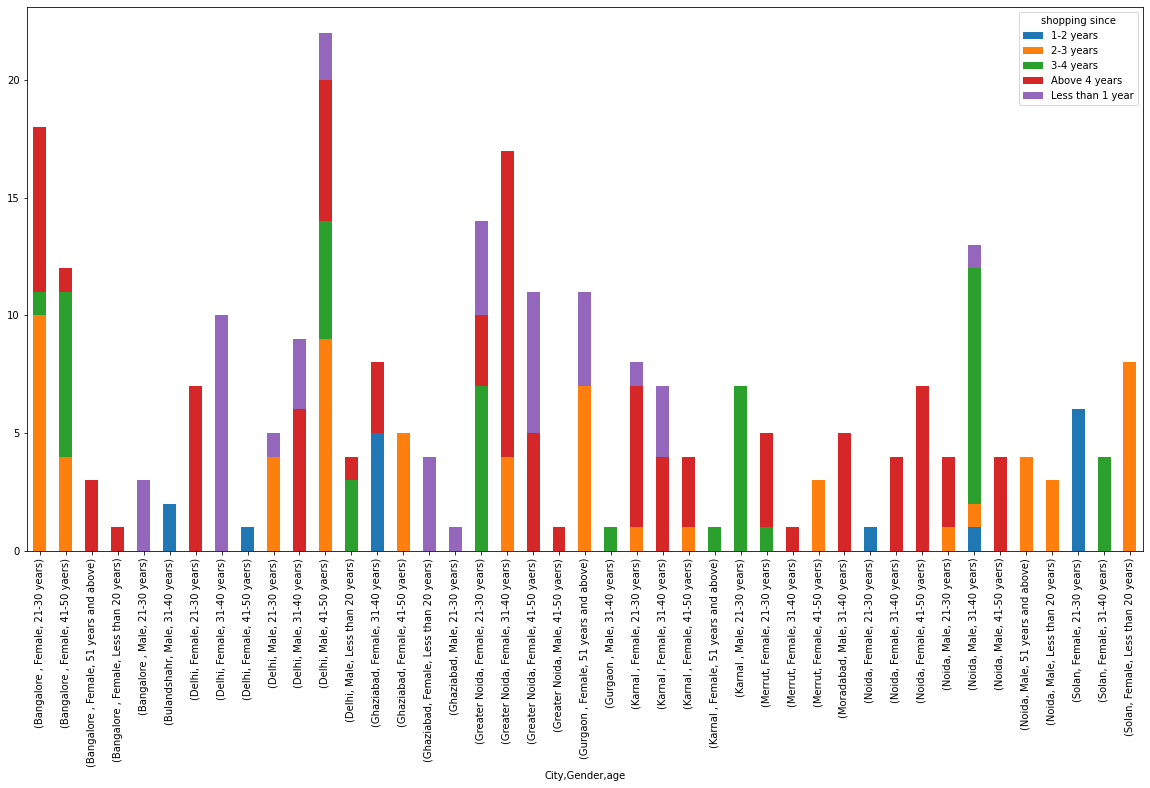

In [16]:
#checking the relation of age,city,gender and how long they have been shopping online
pd.crosstab([cr_df['City'],cr_df['Gender'],cr_df['age']],
cr_df['shopping since']).plot(kind='bar',stacked=True,figsize=(20, 10))

### Observation:
    
1. Bulandshahar consisits of only Male customers age between 31-40 years have been shopping online for 1-2 years.

2. Moradabad consisits of only Male customers age between 31-40 years have been shopping for more than 4 years.

3. Gender ration is approx equal in Delhi only.

4. Banglore shows maximum female customers age between 21-30 years.

5. Delhi shoows maximum Male customers age between 41-50.

<AxesSubplot:xlabel='City'>

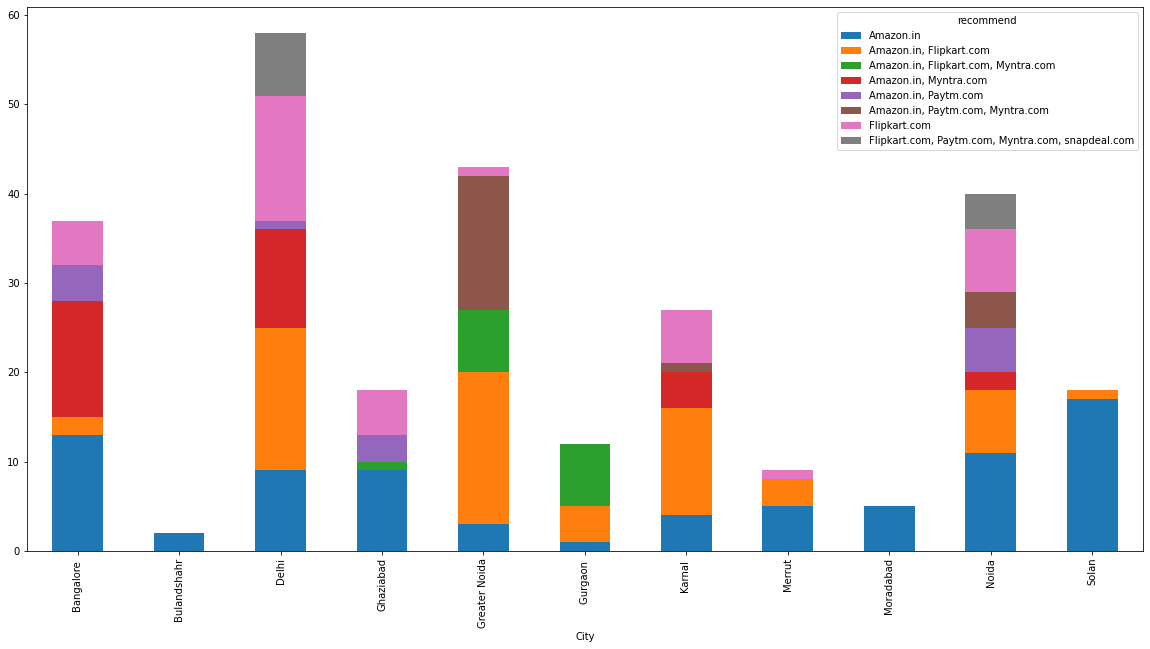

In [17]:
#now going to check recommentdation with respect to city
pd.crosstab(cr_df['City'],
cr_df['recommend']).plot(kind='bar',stacked=True,figsize=(20,10))

### Observation:
    
1. Banglore - People refer Amazon, Myntra the most. The brand value of Amazon and Myntra in Banglore is more than of others.
2. Bulandshahr and Moradabad- Here we can see that only Amazon is recommended.
3. Delhi - Here we can see that there is competition between amazon, flipkart, myntra.
4. Gaziabad - we can see that myntra is not that recommended here.

By comparing all the location we can see that snapdeal.com is not much recommended, only Delhi and Noida shows few numberes where people refer snapdeal.

In Solan only Amazon and Flipkart are referred by the people.

In gurgaon, combination of Amazon, Flipkart and Myntra is there.

In meerut Flipkart and Amazon is prefered.

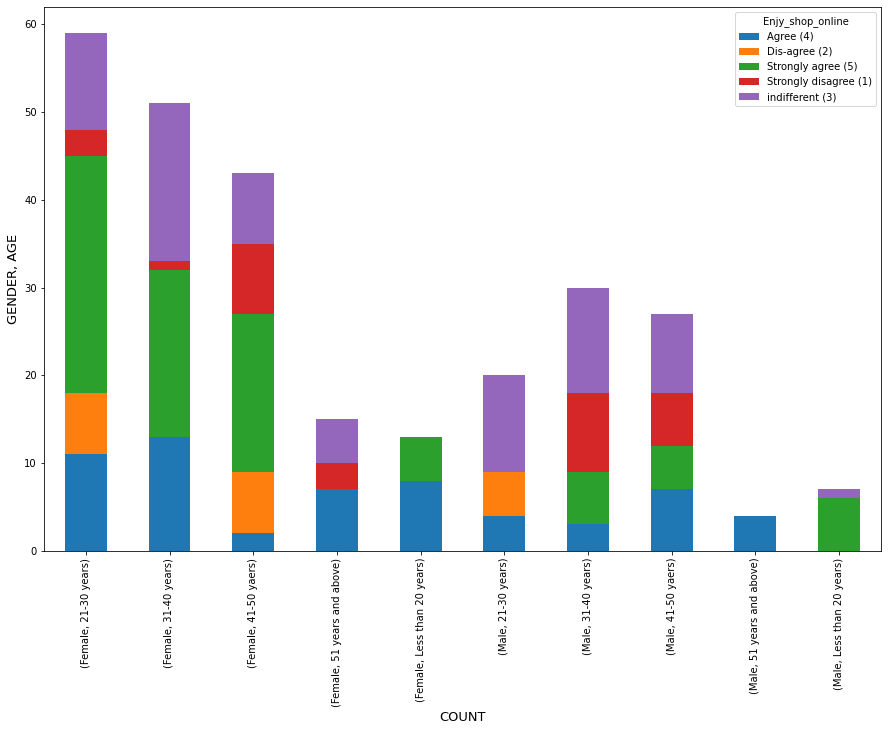

In [18]:
#comparison between gender,age and enjoyment while shopping  online
pd.crosstab([cr_df['Gender'], cr_df['age']], cr_df['Enjy_shop_online']).plot.bar(figsize = (15,10), stacked= True)
plt.xlabel('COUNT', fontsize = 13)
plt.ylabel('GENDER, AGE', fontsize = 13);

### Observation:
    
    Female with age 21-30 are strongly agreeing that enjoying shopping

In [19]:
#checking the independency of variable (age and the device used by customer for online shopping)
#here my null hypothesis is that age of the customer and device they use for online shopping are not dependent
#by using contigency table/ chi square test I will test my hypothesis.
age_device = pd.crosstab(cr_df['age'],cr_df['Device'])
age_device

Device,Desktop,Laptop,Smartphone,Tablet
age,,,,
21-30 years,3,23,50,3
31-40 years,9,38,33,1
41-50 yaers,15,18,30,7
51 years and above,3,7,8,1
Less than 20 years,0,0,20,0


In [20]:
from scipy.stats import chi2_contingency,chi2

In [21]:
#creating a function to calculate the chi2 test statistics 

def chi2_param(table):
    stat, p, dof, expected = chi2_contingency(table)
    print("degree of freedom is = {}".format(dof))
    print("stats is = {}".format(stat))
    print("p-value is = {}".format(p))
    print("expected values are:\n {}".format(expected))
    print('\n')

       

    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print("critical value is = {}".format(critical))
    print("chi2 value we calculated is = {}".format(stat))
    print("Is the chi2 calculated value more than the critical value? : ",stat>critical)
    if abs(stat) >= critical:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')

In [22]:
chi2_param(age_device)

degree of freedom is = 12
stats is = 48.14424194578499
p-value is = 2.9500671207408e-06
expected values are:
 [[ 8.81040892 25.25650558 41.40892193  3.52416357]
 [ 9.03345725 25.89591078 42.45724907  3.6133829 ]
 [ 7.80669145 22.37918216 36.69144981  3.12267658]
 [ 2.11895911  6.07434944  9.95910781  0.84758364]
 [ 2.23048327  6.39405204 10.48327138  0.89219331]]


critical value is = 21.02606981748307
chi2 value we calculated is = 48.14424194578499
Is the chi2 calculated value more than the critical value? :  True
Dependent (reject H0)


So, here we can see that age variable and device used variable are dependent to each other. Our null gypothesis got rejected as our chi square calculated value is more than the critical value at 12 degree of freedom and at 95% significance level. So any of these variable can be dropped when we feed data into model, however we do have to check the correlation of the above variable with the target variable 1st, after that only which ever variable will be having high correlation with the target variable we will take that variable for model building.

<AxesSubplot:title={'center':'Gender vs age vs cart abandone'}, xlabel='Gender,age'>

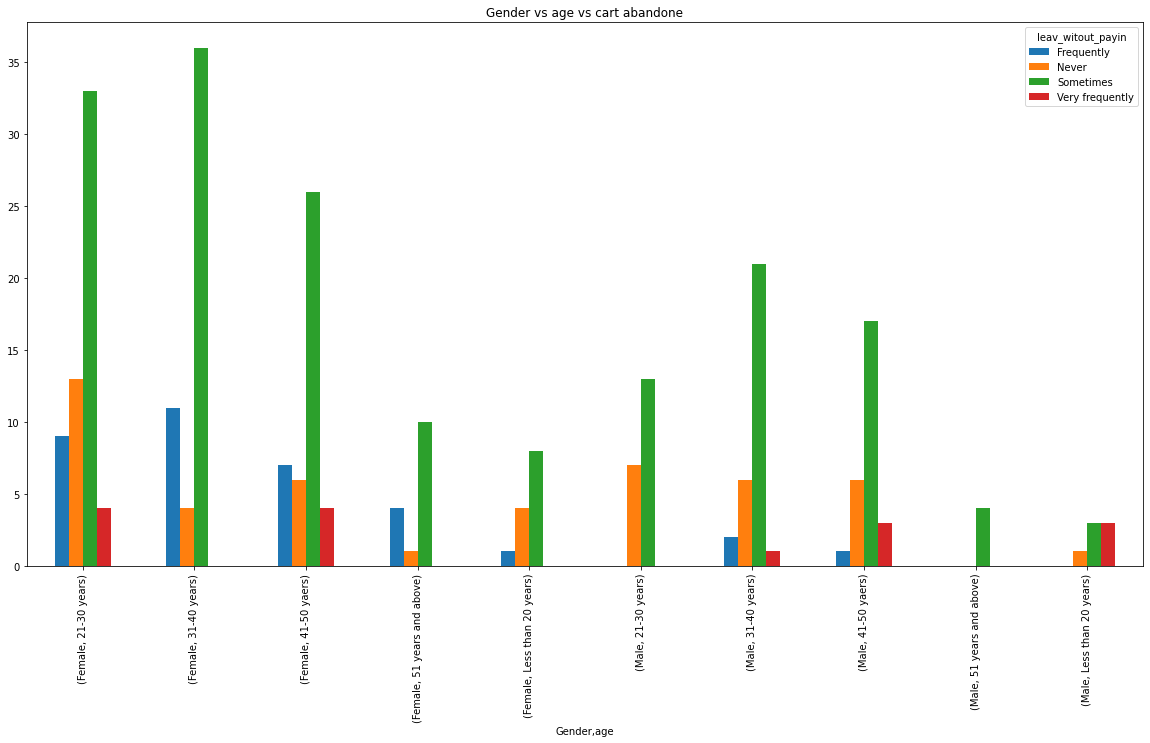

In [23]:
#checking the relation between the gender, age and the times customer abandon the online shopping cart
pd.crosstab([cr_df['Gender'],cr_df['age']],
           cr_df['leav_witout_payin']).plot(kind='bar',figsize=(20,10),title='Gender vs age vs cart abandone')

1. Females are more likely to abandon the online shopping cart.
2. Customers below 20 years old don't abandon that much.

<AxesSubplot:title={'center':'age vs reason abandone'}, xlabel='age'>

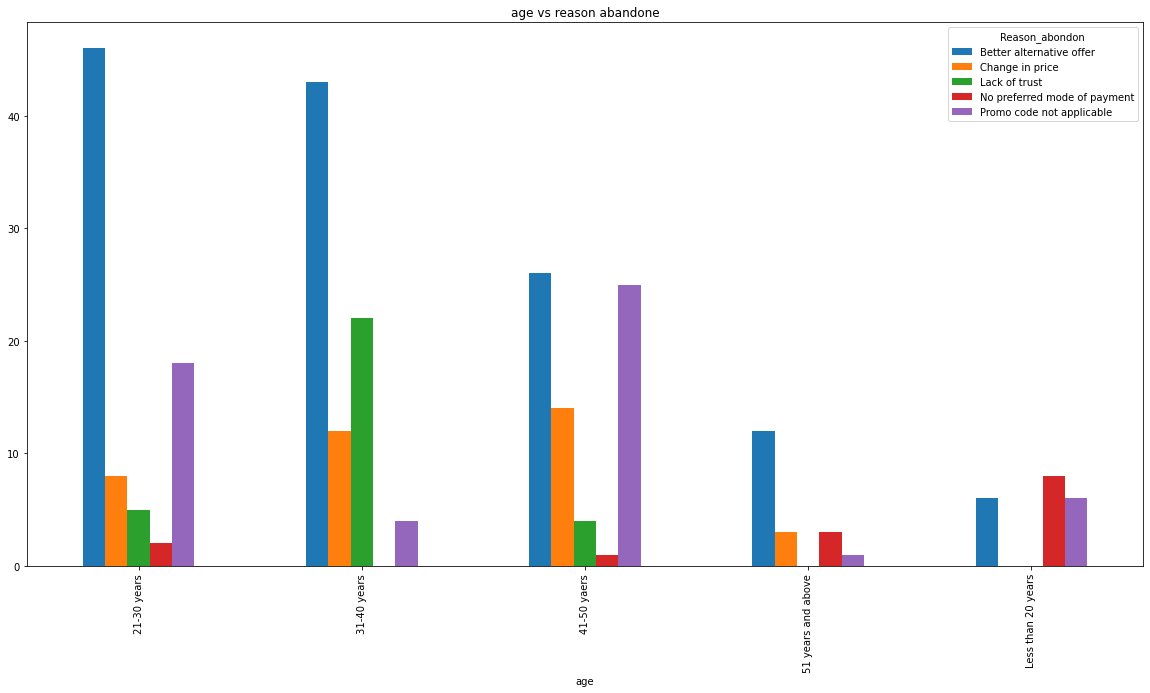

In [24]:
#checking the relation between the age of the customer and the reason of abandoning online shopping cart
pd.crosstab(cr_df['age'],cr_df['Reason_abondon']).plot(kind='bar',figsize=(20,10),title='age vs reason abandone')

In [25]:
chi2_param(pd.crosstab(cr_df['age'],cr_df['Reason_abondon']))

degree of freedom is = 16
stats is = 115.99491738190628
p-value is = 3.2225346232096846e-17
expected values are:
 [[39.05947955 10.866171    9.10408922  4.11152416 15.85873606]
 [40.04832714 11.14126394  9.33457249  4.21561338 16.26022305]
 [34.60966543  9.62825279  8.0669145   3.64312268 14.05204461]
 [ 9.39405204  2.6133829   2.18959108  0.98884758  3.81412639]
 [ 9.88847584  2.75092937  2.30483271  1.04089219  4.01486989]]


critical value is = 26.29622760486423
chi2 value we calculated is = 115.99491738190628
Is the chi2 calculated value more than the critical value? :  True
Dependent (reject H0)


### Observation:
    
    Here we can see that the age of the customer and the reason for abandoning the online shopping care is very highly dependent with each other. Most the of the customers age between 21-50 years abandone the online shopping cart due to better alternative offers available to them. These are the customer to explore more while shopping online.

<AxesSubplot:xlabel='empathy_assist_queries'>

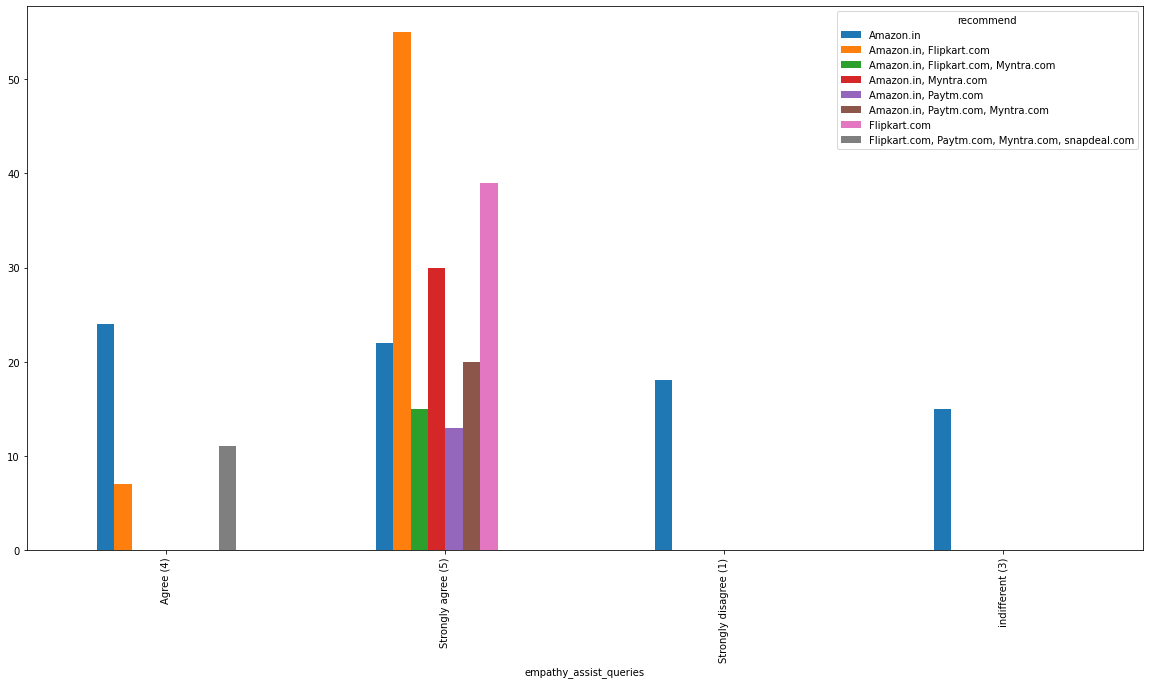

In [26]:
#COMPARISON OF EMPATY ON ASSITING QUERIES AND RECOMMENDED SITES

pd.crosstab(cr_df['empathy_assist_queries'],
            cr_df['recommend']).plot(kind='bar',figsize=(20,10))

Most of the customers are strongly agrred with Amazon and Flipkart and they also recommended these online sites for shopping

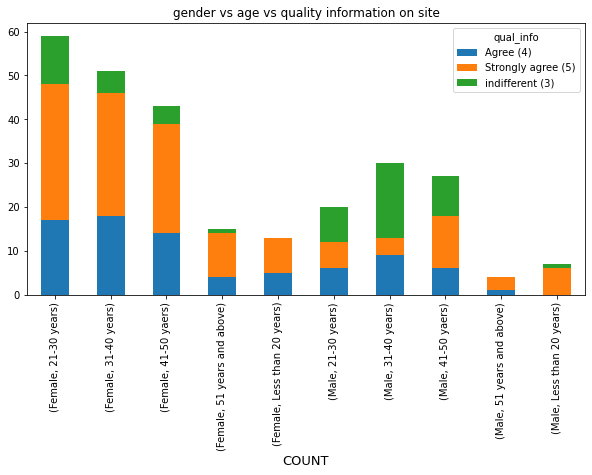

In [27]:
#checking relation between gender, age and satisfaction due to quality information
pd.crosstab([cr_df['Gender'], cr_df['age']], cr_df['qual_info']).plot.bar(figsize = (10,5), stacked = True,title='gender vs age vs quality information on site')
plt.xlabel('COUNT', fontsize = 13);

female under age 21-30 are agreeing more for displaying quality

<AxesSubplot:xlabel='age'>

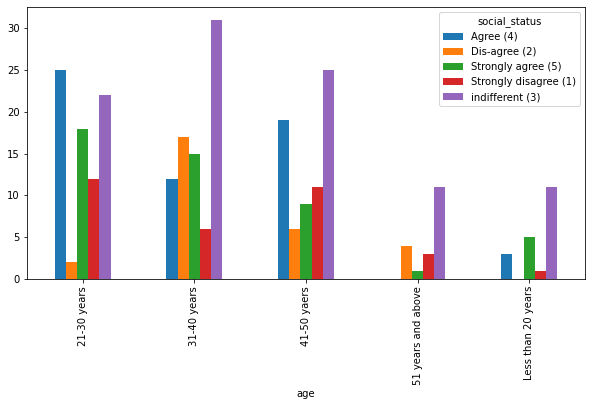

In [28]:
#checking the relationship between the age of the users and social status fulfilment
pd.crosstab(cr_df['age'],cr_df['social_status']).plot(kind='bar',figsize=(10,5))

Users who are less than 20 years and more than 50 years are indifferent about their social status if it is being enhanced by online shopping

In [29]:
#I will use chi sq to check the feature importance
#Here Gender is our target variable.
# I will ssplit the data into input and output where output will be gender

X = cr_df.drop('Gender',axis=1)
Y = cr_df['Gender']

In [30]:
#Now I will encode the data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [31]:
for i in X:
    X[i] = le.fit_transform(X[i])
    
X.head()

,age,City,Pin code,shopping since,shop_past_1_year,access_internet,Device,Screen_size,OS,Browser,channel_1_time,channel_after_1_time,time_spent_bfore_deci,Payment_opt,leav_witout_payin,Reason_abondon,content_understanding,prod_comparison_info,Comp_info_liseller,relevant_prod_info,web_nav,load_speed,interface,paying_method,Trust_on_transac,empathy_assist_queries,Privacy_customer,Responsive_comm,benefits_discounts,Enjy_shop_online,Conv_flexi,replace_policy_imp,loyality_prog,qual_info,website_quality,Net_benf,trust,wide_var_prod,Prov_prod_info,Money_savings,con_pat_retlr,sense_adven_shopon,social_status,gratification,fullfill_roles,value_for_money,onlin_reatl_shp_frm,easy_use_app,vis_web_layout,var_prod_off,desc_info_prods,fast_load,reliab_web,Quick_comp,Avail_pay_opt,speed_odr_del,pri_cust_info,sec_cust_fin_info,perceived_trust,pre_onlin_assist,lon_tim_to_login,lon_tim_disp_graphics,lat_dec_price,lon_page_load_tim,lim_mod_pay,lon_del_period,chng_in_app_des,dirupt_frm_pag_mov,web_is_eff_bfre,recommend
0,1,2,1,3,2,0,0,3,2,0,2,2,2,2,2,2,0,2,2,0,0,4,1,1,1,1,0,0,4,3,1,1,0,2,2,0,2,3,3,1,2,0,0,2,0,1,7,9,7,5,10,9,9,8,9,0,0,0,7,9,0,0,3,5,0,3,2,0,0,6
1,0,2,5,3,3,2,2,0,1,0,2,4,4,1,3,4,2,3,3,2,2,3,3,2,2,1,1,1,2,2,2,2,2,1,2,2,2,2,2,2,2,4,4,2,2,1,2,3,5,6,2,2,8,2,2,1,9,9,8,2,1,6,7,10,7,5,0,4,1,3
2,0,4,23,2,3,1,2,2,0,0,2,4,1,2,2,4,2,0,0,0,0,0,3,2,2,1,1,1,2,2,2,2,2,1,2,2,0,2,2,2,0,0,0,4,4,0,8,7,6,4,7,7,6,5,10,0,0,6,6,8,7,6,4,7,0,3,5,6,0,5
3,0,6,11,2,5,1,2,2,1,3,2,2,2,1,1,0,0,0,2,0,2,0,3,2,0,1,1,0,0,4,3,0,4,2,0,3,0,0,0,2,0,0,2,0,4,0,4,4,3,1,1,6,3,3,2,3,2,5,5,3,9,7,4,8,5,3,1,1,2,1
4,0,0,31,1,0,2,2,0,1,3,0,4,4,1,0,0,2,2,2,0,0,3,3,2,0,1,0,1,2,2,2,2,1,0,2,2,2,0,0,2,0,4,3,2,3,1,4,4,9,7,5,0,6,4,4,0,7,10,6,5,5,8,5,8,7,3,0,7,6,3


In [32]:
from sklearn.feature_selection import chi2

In [33]:
#finding fcalue and p calue of each categorical variable with respect to the target variable using chi2 test
f_p_value = chi2(X,Y)

In [34]:
f_p_value

(array([6.01502852e-01, 3.96675445e+00, 1.32428040e+02, 5.20359216e-01,
        1.51860900e+00, 5.62830409e+00, 3.83051081e-01, 8.79249042e-02,
        6.57279654e-02, 3.14105674e+00, 3.08026123e-01, 1.12246220e+01,
        3.22563605e-01, 7.19916093e-01, 2.25529379e+00, 4.22070905e+00,
        1.29165622e+01, 1.29292969e+01, 1.06831115e+01, 1.82253197e+00,
        5.09396389e+00, 1.58126800e+00, 1.34502766e+01, 1.24194307e+01,
        2.50195131e+00, 4.75342884e+00, 1.74151191e+00, 2.24371349e+01,
        1.84350763e-01, 5.25866572e+00, 7.88676214e-03, 3.18929307e+00,
        2.26273016e+00, 8.06201401e+00, 1.00309930e+01, 7.29905285e+00,
        4.51026543e-01, 8.90558137e-01, 3.21344146e-02, 3.82392811e+00,
        8.69762006e+00, 1.06661149e+00, 3.70513565e-01, 1.28598863e+01,
        9.29524504e-01, 3.67947258e+00, 2.85535652e+00, 3.15132019e+00,
        3.59621104e-01, 8.70636615e-02, 1.22478773e+01, 2.32308482e+01,
        9.22847021e+00, 1.27801570e+00, 1.68001011e+00, 3.975974

Higher the F-score, more the feature is important

In [35]:
#I will plot a barplot of all the features based on the f-score and show the importance of each f-score towards target variable

f_score = pd.Series(f_p_value[0])
f_score.index = X.columns 

In [36]:
f_score = f_score.sort_values(ascending=False)

<AxesSubplot:title={'center':'Feature selection using chi2 test'}>

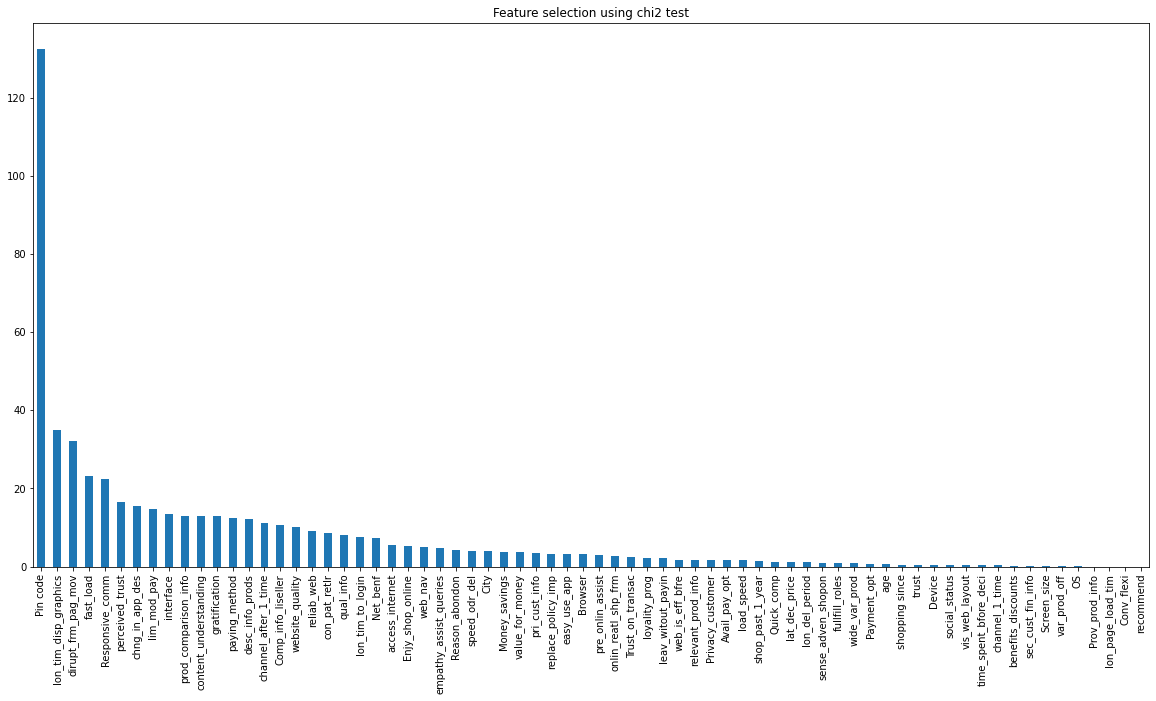

In [37]:
f_score.plot(kind='bar',figsize=(20,10),title='Feature selection using chi2 test')

### Observation:
    
    Pin code shows the most importance towards target variable

In [38]:
#lets check correlation as well
df_encoded = cr_df.copy()

In [39]:
for i in df_encoded.columns:
    df_encoded[i] = le.fit_transform(df_encoded[i])

In [40]:
df_encoded.head()

,Gender,age,City,Pin code,shopping since,shop_past_1_year,access_internet,Device,Screen_size,OS,Browser,channel_1_time,channel_after_1_time,time_spent_bfore_deci,Payment_opt,leav_witout_payin,Reason_abondon,content_understanding,prod_comparison_info,Comp_info_liseller,relevant_prod_info,web_nav,load_speed,interface,paying_method,Trust_on_transac,empathy_assist_queries,Privacy_customer,Responsive_comm,benefits_discounts,Enjy_shop_online,Conv_flexi,replace_policy_imp,loyality_prog,qual_info,website_quality,Net_benf,trust,wide_var_prod,Prov_prod_info,Money_savings,con_pat_retlr,sense_adven_shopon,social_status,gratification,fullfill_roles,value_for_money,onlin_reatl_shp_frm,easy_use_app,vis_web_layout,var_prod_off,desc_info_prods,fast_load,reliab_web,Quick_comp,Avail_pay_opt,speed_odr_del,pri_cust_info,sec_cust_fin_info,perceived_trust,pre_onlin_assist,lon_tim_to_login,lon_tim_disp_graphics,lat_dec_price,lon_page_load_tim,lim_mod_pay,lon_del_period,chng_in_app_des,dirupt_frm_pag_mov,web_is_eff_bfre,recommend
0,1,1,2,1,3,2,0,0,3,2,0,2,2,2,2,2,2,0,2,2,0,0,4,1,1,1,1,0,0,4,3,1,1,0,2,2,0,2,3,3,1,2,0,0,2,0,1,7,9,7,5,10,9,9,8,9,0,0,0,7,9,0,0,3,5,0,3,2,0,0,6
1,0,0,2,5,3,3,2,2,0,1,0,2,4,4,1,3,4,2,3,3,2,2,3,3,2,2,1,1,1,2,2,2,2,2,1,2,2,2,2,2,2,2,4,4,2,2,1,2,3,5,6,2,2,8,2,2,1,9,9,8,2,1,6,7,10,7,5,0,4,1,3
2,0,0,4,23,2,3,1,2,2,0,0,2,4,1,2,2,4,2,0,0,0,0,0,3,2,2,1,1,1,2,2,2,2,2,1,2,2,0,2,2,2,0,0,0,4,4,0,8,7,6,4,7,7,6,5,10,0,0,6,6,8,7,6,4,7,0,3,5,6,0,5
3,1,0,6,11,2,5,1,2,2,1,3,2,2,2,1,1,0,0,0,2,0,2,0,3,2,0,1,1,0,0,4,3,0,4,2,0,3,0,0,0,2,0,0,2,0,4,0,4,4,3,1,1,6,3,3,2,3,2,5,5,3,9,7,4,8,5,3,1,1,2,1
4,0,0,0,31,1,0,2,2,0,1,3,0,4,4,1,0,0,2,2,2,0,0,3,3,2,0,1,0,1,2,2,2,2,1,0,2,2,2,0,0,2,0,4,3,2,3,1,4,4,9,7,5,0,6,4,4,0,7,10,6,5,5,8,5,8,7,3,0,7,6,3


<AxesSubplot:>

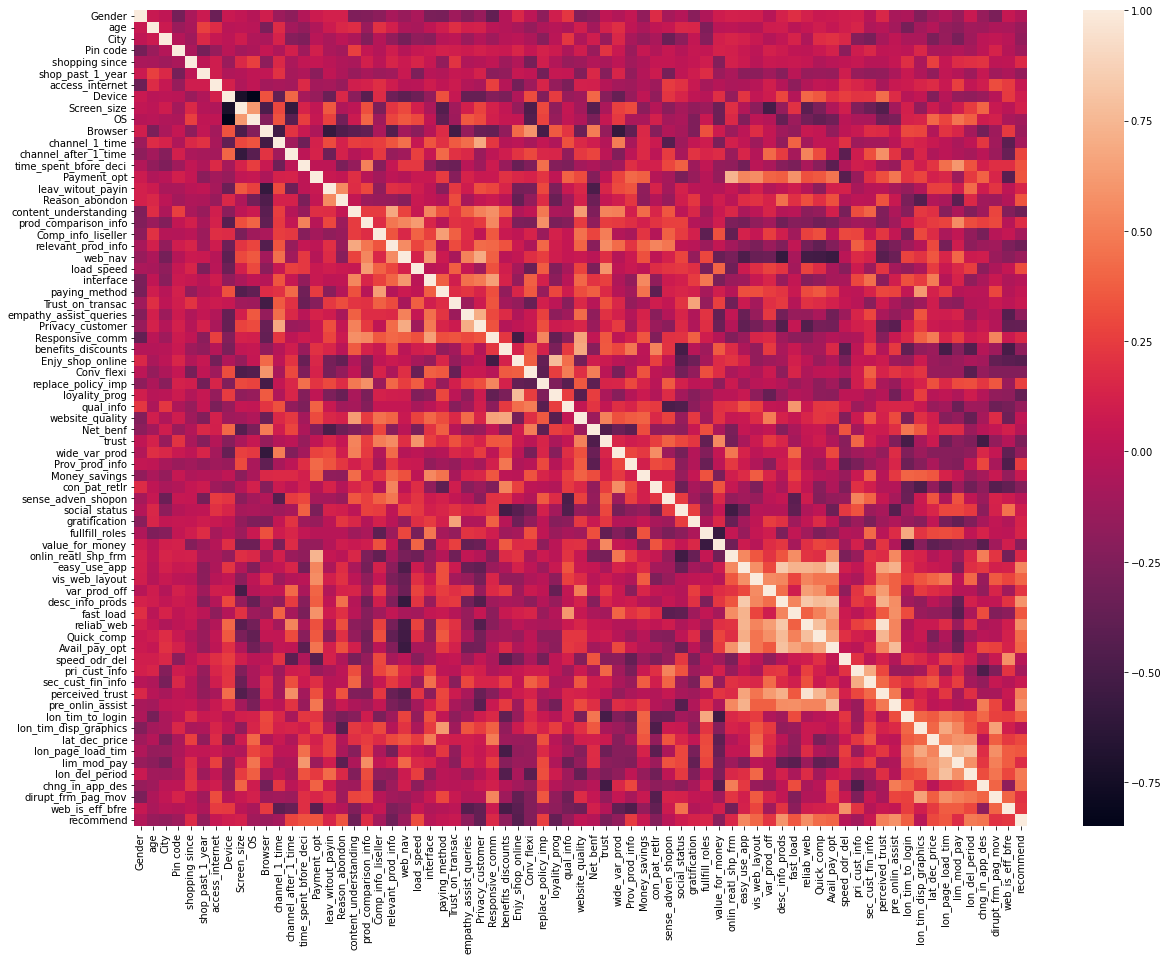

In [41]:
# I will use spearman correlation and plot them using sns heatmap to check correlation between input variables and target variable

plt.figure(figsize=(20,15))
sns.heatmap(df_encoded.corr(method='spearman'))

We can see that there are many variables which have high and low correlation with other independent variables. We can also use correlation matrix to check the relation/ dependencies between the independent and target variables. We can remove one of the highly correlated independent variable to get rid of the problem of multicollinearity.

In [42]:
#filtering the list of correlation between variables from highly negative to highly positive

s = df_encoded.corr(method='spearman').unstack()
so = s.sort_values(kind="quicksort")

In [43]:
so[so.values>.8].drop_duplicates()

reliab_web       desc_info_prods    0.824962
desc_info_prods  easy_use_app       0.839925
easy_use_app     Avail_pay_opt      0.857014
reliab_web       perceived_trust    0.953129
Gender           Gender             1.000000
dtype: float64

## Checking for descriptive statistics

In [44]:
df_encoded.describe()

,Gender,age,City,Pin code,shopping since,shop_past_1_year,access_internet,Device,Screen_size,OS,Browser,channel_1_time,channel_after_1_time,time_spent_bfore_deci,Payment_opt,leav_witout_payin,Reason_abondon,content_understanding,prod_comparison_info,Comp_info_liseller,relevant_prod_info,web_nav,load_speed,interface,paying_method,Trust_on_transac,empathy_assist_queries,Privacy_customer,Responsive_comm,benefits_discounts,Enjy_shop_online,Conv_flexi,replace_policy_imp,loyality_prog,qual_info,website_quality,Net_benf,trust,wide_var_prod,Prov_prod_info,Money_savings,con_pat_retlr,sense_adven_shopon,social_status,gratification,fullfill_roles,value_for_money,onlin_reatl_shp_frm,easy_use_app,vis_web_layout,var_prod_off,desc_info_prods,fast_load,reliab_web,Quick_comp,Avail_pay_opt,speed_odr_del,pri_cust_info,sec_cust_fin_info,perceived_trust,pre_onlin_assist,lon_tim_to_login,lon_tim_disp_graphics,lat_dec_price,lon_page_load_tim,lim_mod_pay,lon_del_period,chng_in_app_des,dirupt_frm_pag_mov,web_is_eff_bfre,recommend
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,0.327138,1.330855,4.494424,18.163569,2.323420,3.237918,1.267658,1.501859,2.256506,1.137546,0.524164,1.780669,2.081784,2.695167,0.884758,1.617100,1.327138,1.446097,1.680297,1.587361,1.040892,1.267658,1.617100,2.457249,1.293680,1.293680,1.022305,0.881041,0.802974,1.765799,2.159851,1.498141,1.546468,1.985130,0.910781,1.330855,1.706320,1.208178,1.486989,1.368030,1.382900,0.773234,1.520446,2.319703,2.267658,2.040892,0.587361,3.791822,3.472119,2.977695,2.185874,3.003717,3.762082,3.237918,2.921933,3.680297,1.301115,3.315985,4.386617,3.215613,3.193309,4.044610,4.063197,3.843866,5.988848,3.717472,2.736059,2.189591,3.587361,2.133829,2.397770
std,0.470042,1.183774,3.187687,10.343865,1.176357,1.739331,0.476025,0.751240,0.944942,0.867985,1.097985,0.566672,1.555204,1.336910,0.661938,0.781219,1.589626,0.989626,1.330618,1.375691,1.076461,1.055774,1.483191,1.216734,0.897341,0.969304,0.668776,0.547018,0.759413,1.438082,1.468737,1.038888,0.793324,1.416771,0.706734,0.929520,0.953781,1.133516,1.173724,1.093681,0.953316,0.866386,1.537027,1.581735,1.589058,1.682383,0.725847,2.185725,2.415004,2.809808,2.253278,3.025388,2.838155,2.861722,2.626899,3.043531,1.497024,3.379118,3.219456,2.798917,2.777809,3.343218,3.177536,2.103162,2.855321,2.853728,1.725857,2.152169,2.557690,2.171029,2.362991
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,10.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.0

In [47]:
df_encoded.columns

Index(['Gender', 'age', 'City', 'Pin code', 'shopping since',
       'shop_past_1_year', 'access_internet', 'Device', 'Screen_size', 'OS',
       'Browser', 'channel_1_time', 'channel_after_1_time',
       'time_spent_bfore_deci', 'Payment_opt', 'leav_witout_payin',
       'Reason_abondon', 'content_understanding', 'prod_comparison_info',
       'Comp_info_liseller', 'relevant_prod_info', 'web_nav', 'load_speed',
       'interface', 'paying_method', 'Trust_on_transac',
       'empathy_assist_queries', 'Privacy_customer', 'Responsive_comm',
       'benefits_discounts', 'Enjy_shop_online', 'Conv_flexi',
       'replace_policy_imp', 'loyality_prog', 'qual_info', 'website_quality',
       'Net_benf', 'trust', 'wide_var_prod', 'Prov_prod_info', 'Money_savings',
       'con_pat_retlr', 'sense_adven_shopon', 'social_status', 'gratification',
       'fullfill_roles', 'value_for_money', 'onlin_reatl_shp_frm',
       'easy_use_app', 'vis_web_layout', 'var_prod_off', 'desc_info_prods',
       'fa

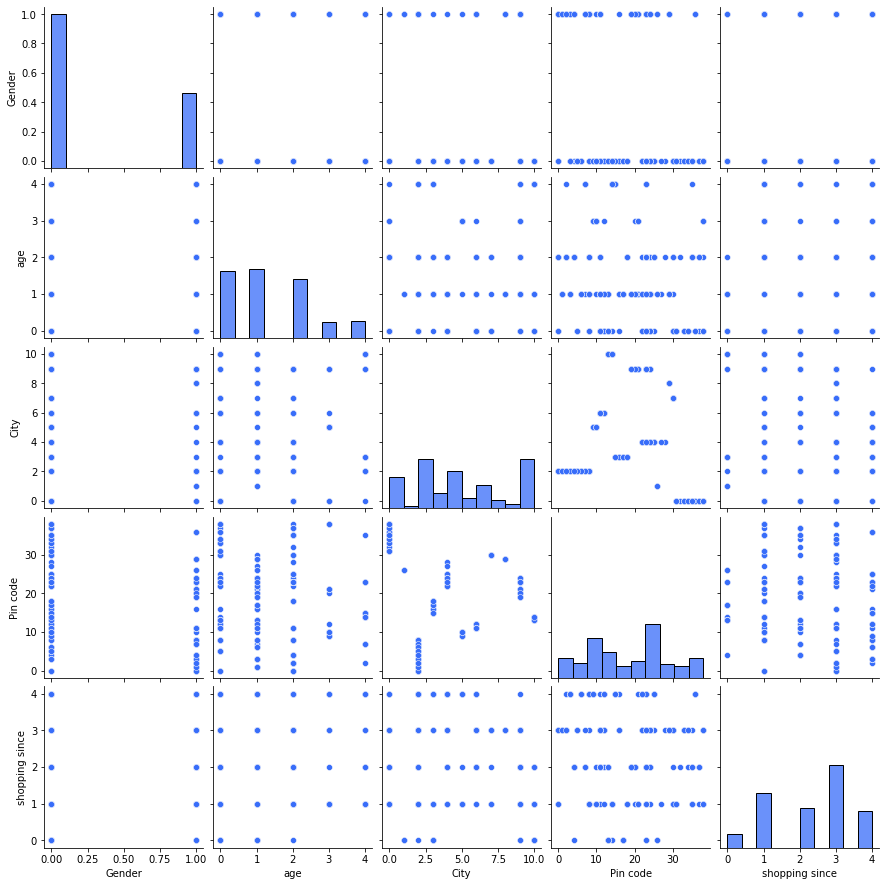

In [48]:
sns.set_palette('rainbow')
sns.pairplot(df_encoded,vars=['Gender', 'age', 'City', 'Pin code', 'shopping since'])

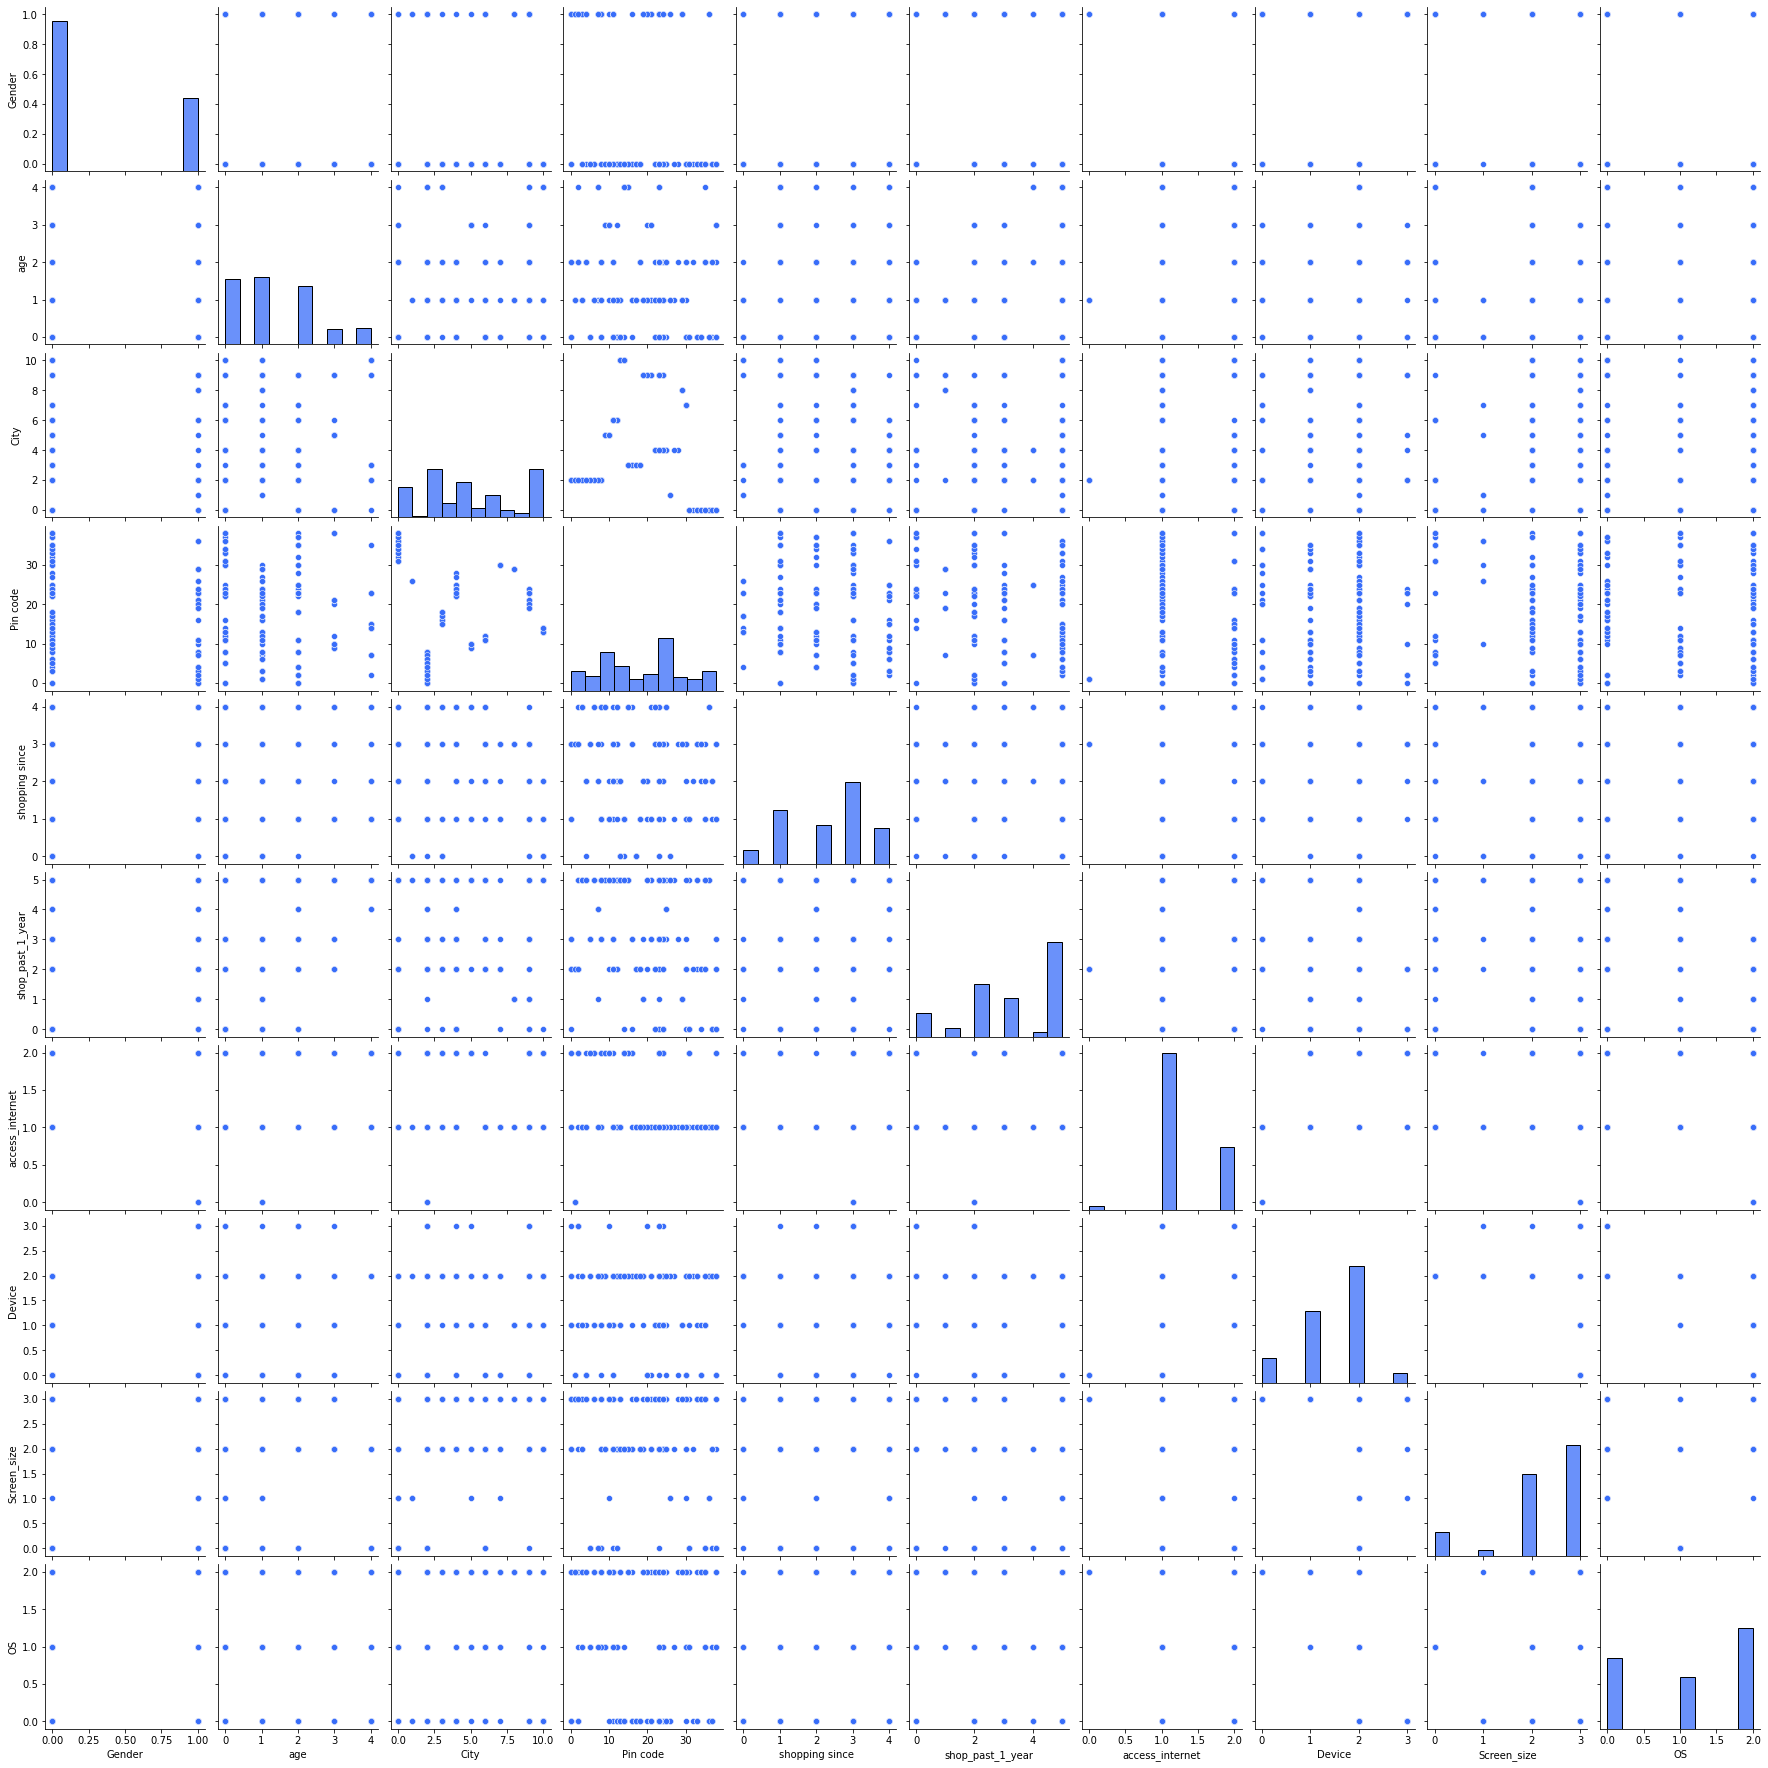

In [58]:
# Plot the first 10 columns
cols_to_plot = df_encoded.columns[0:10].tolist()
sns.set_palette('rainbow')
sns.pairplot(df_encoded,vars=cols_to_plot)

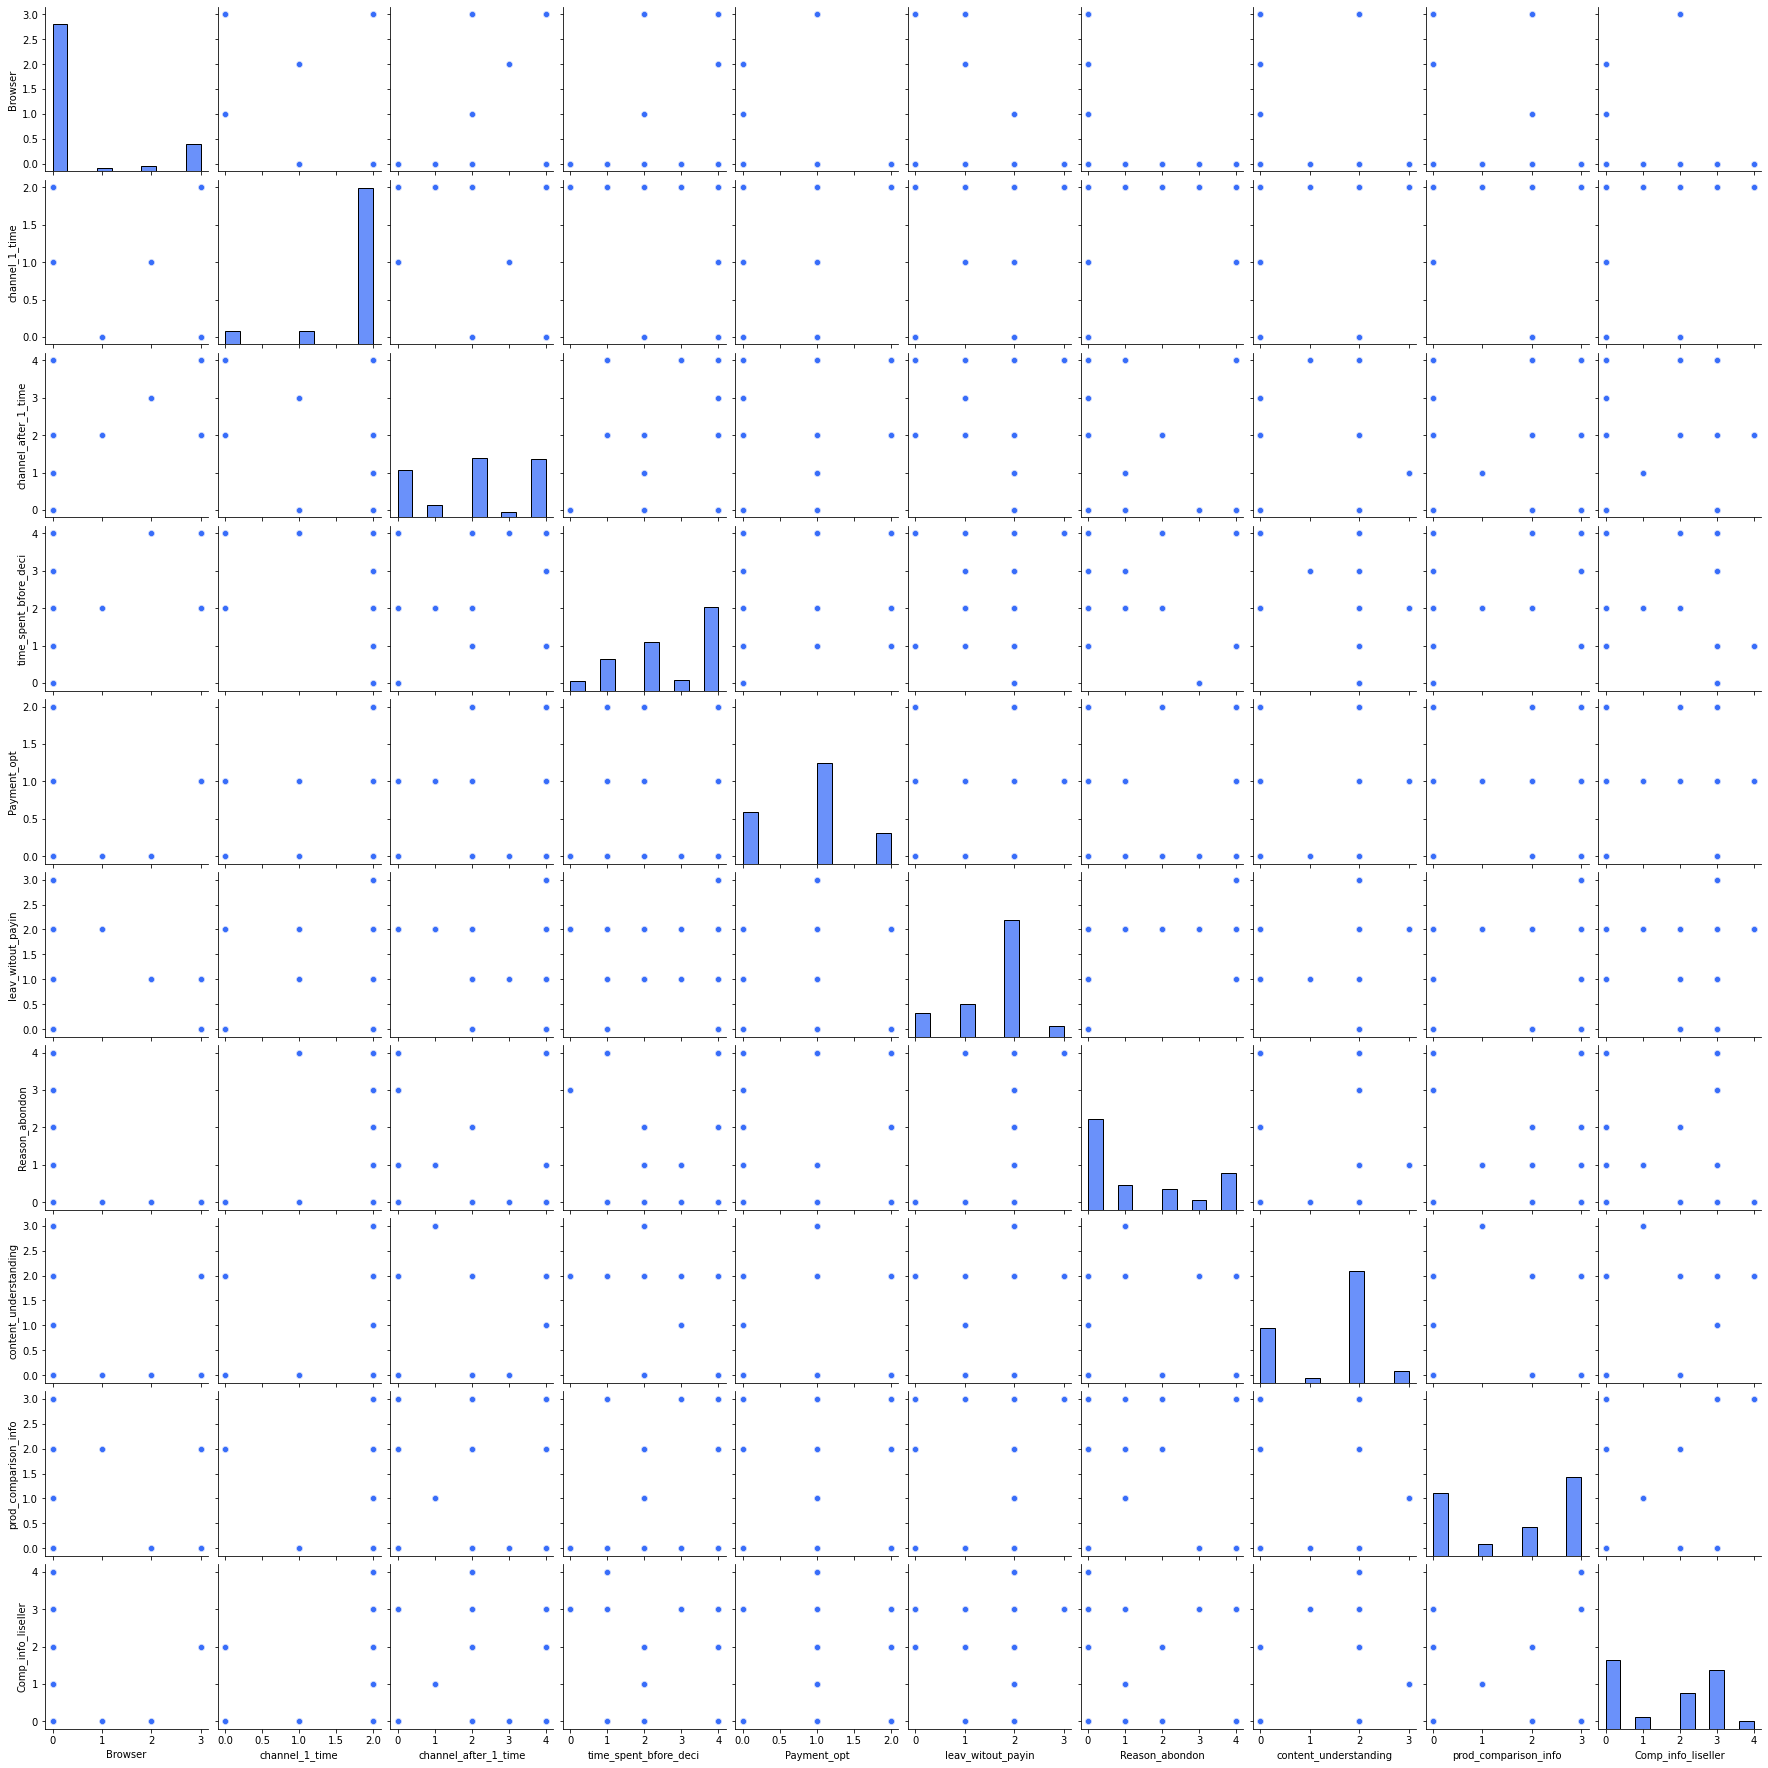

In [59]:
# Plot the next 10 columns
cols_to_plot = df_encoded.columns[10:20].tolist()
sns.set_palette('rainbow')
sns.pairplot(df_encoded,vars=cols_to_plot)

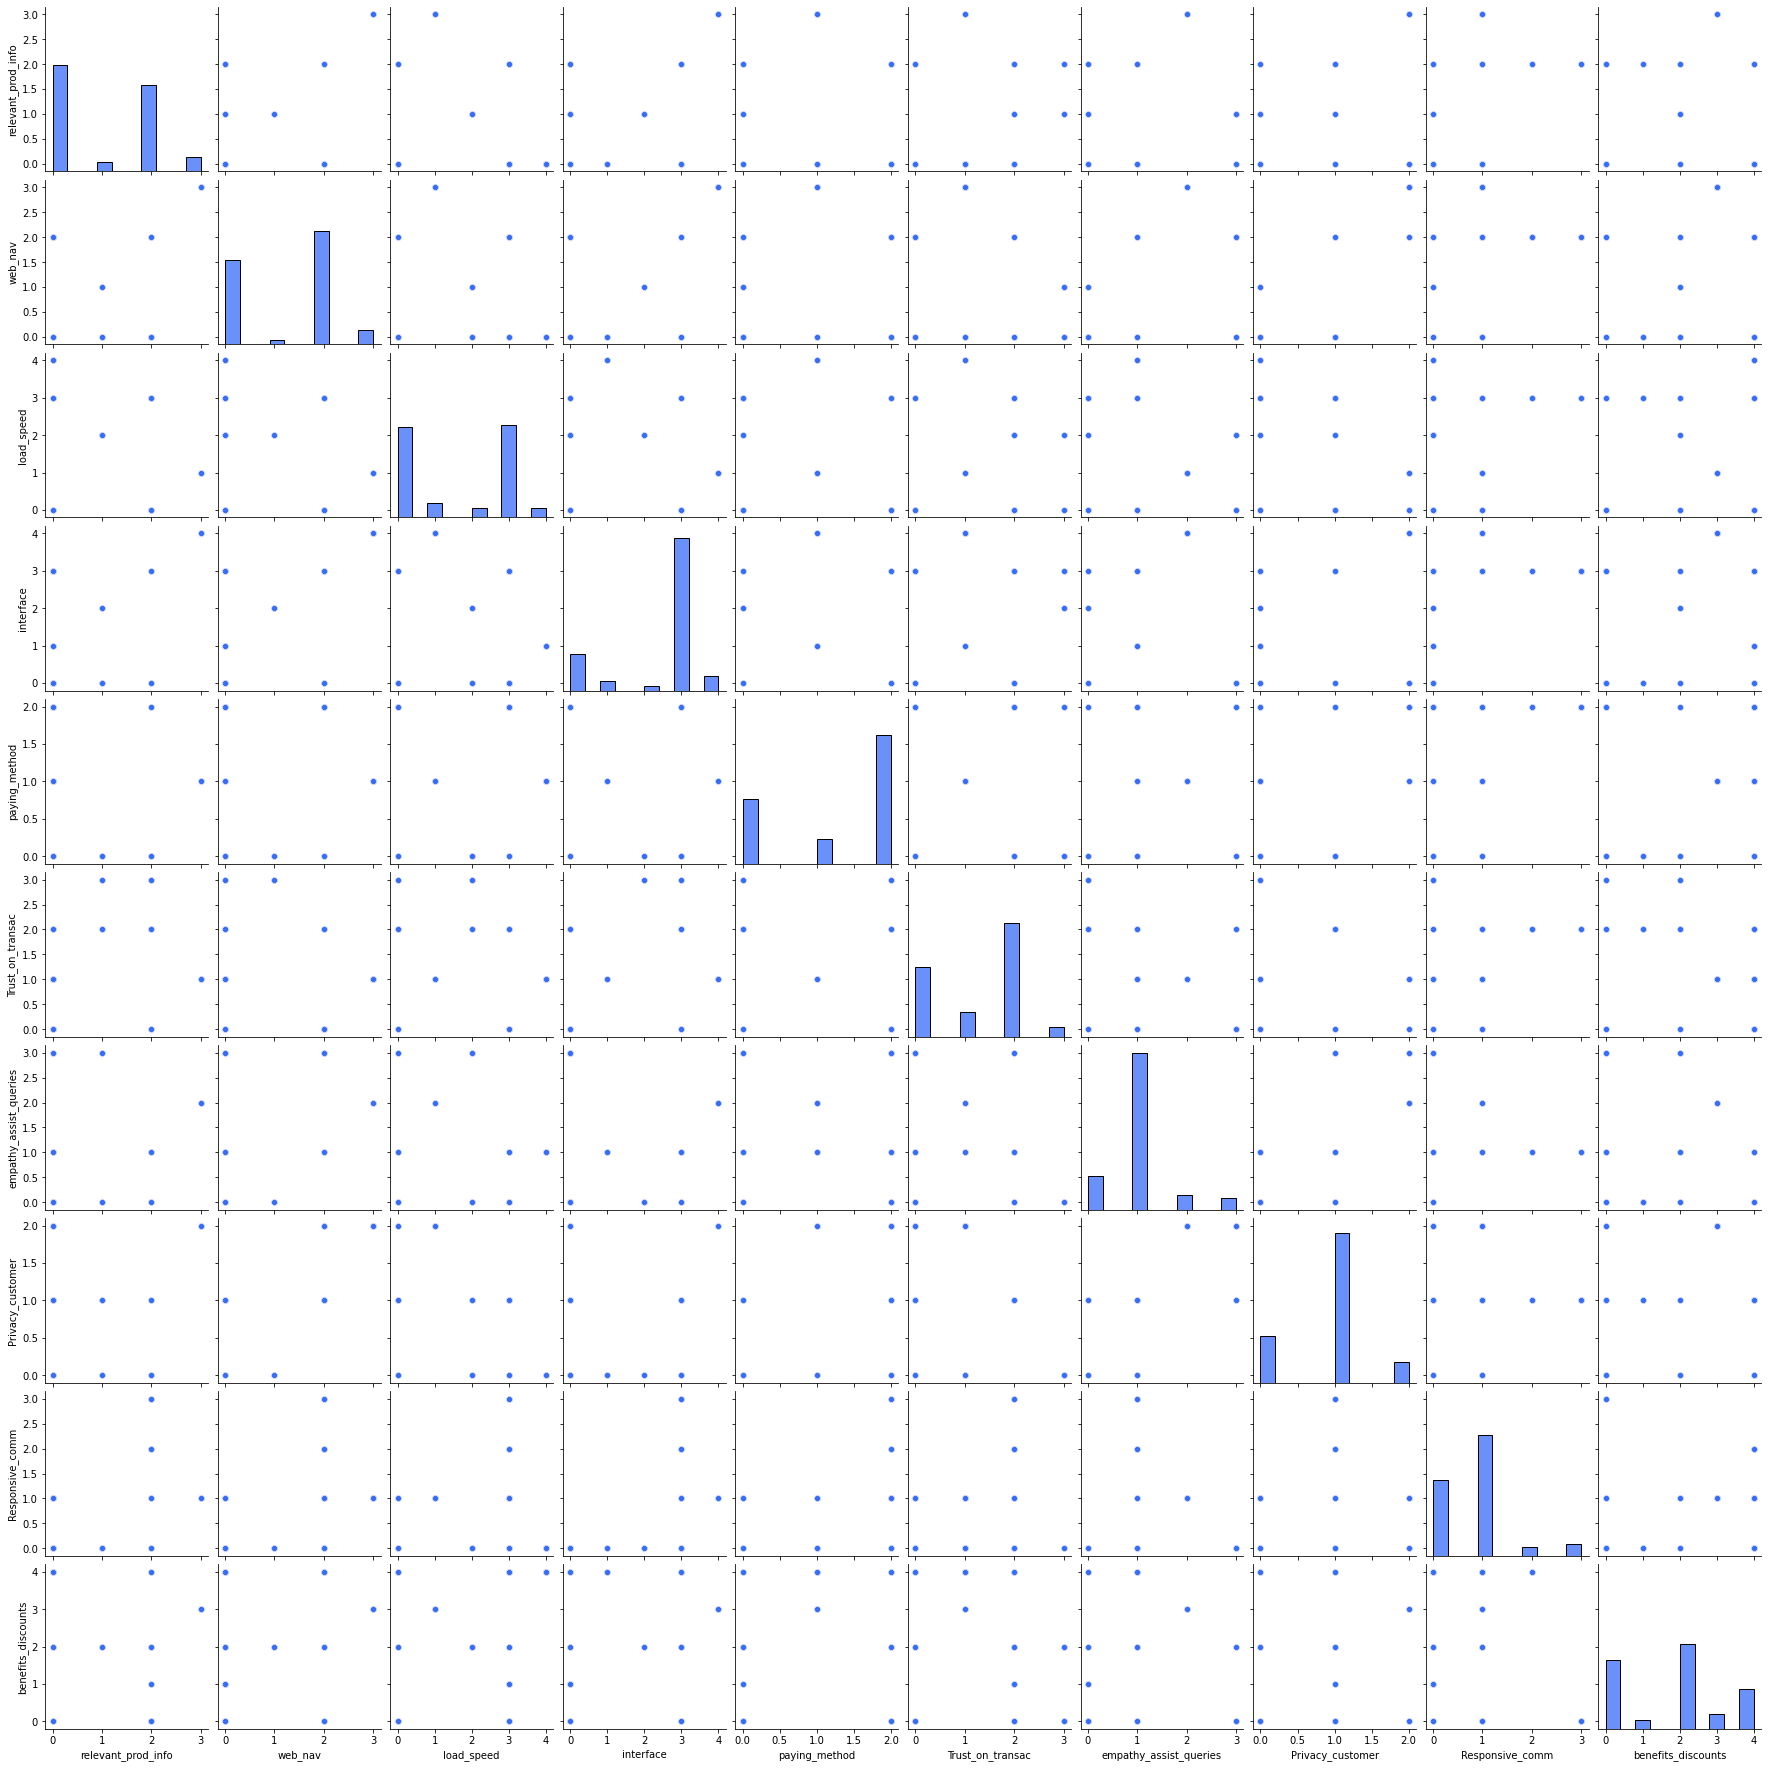

In [60]:
# Plot the next 10 columns
cols_to_plot = df_encoded.columns[20:30].tolist()
sns.set_palette('rainbow')
sns.pairplot(df_encoded,vars=cols_to_plot)

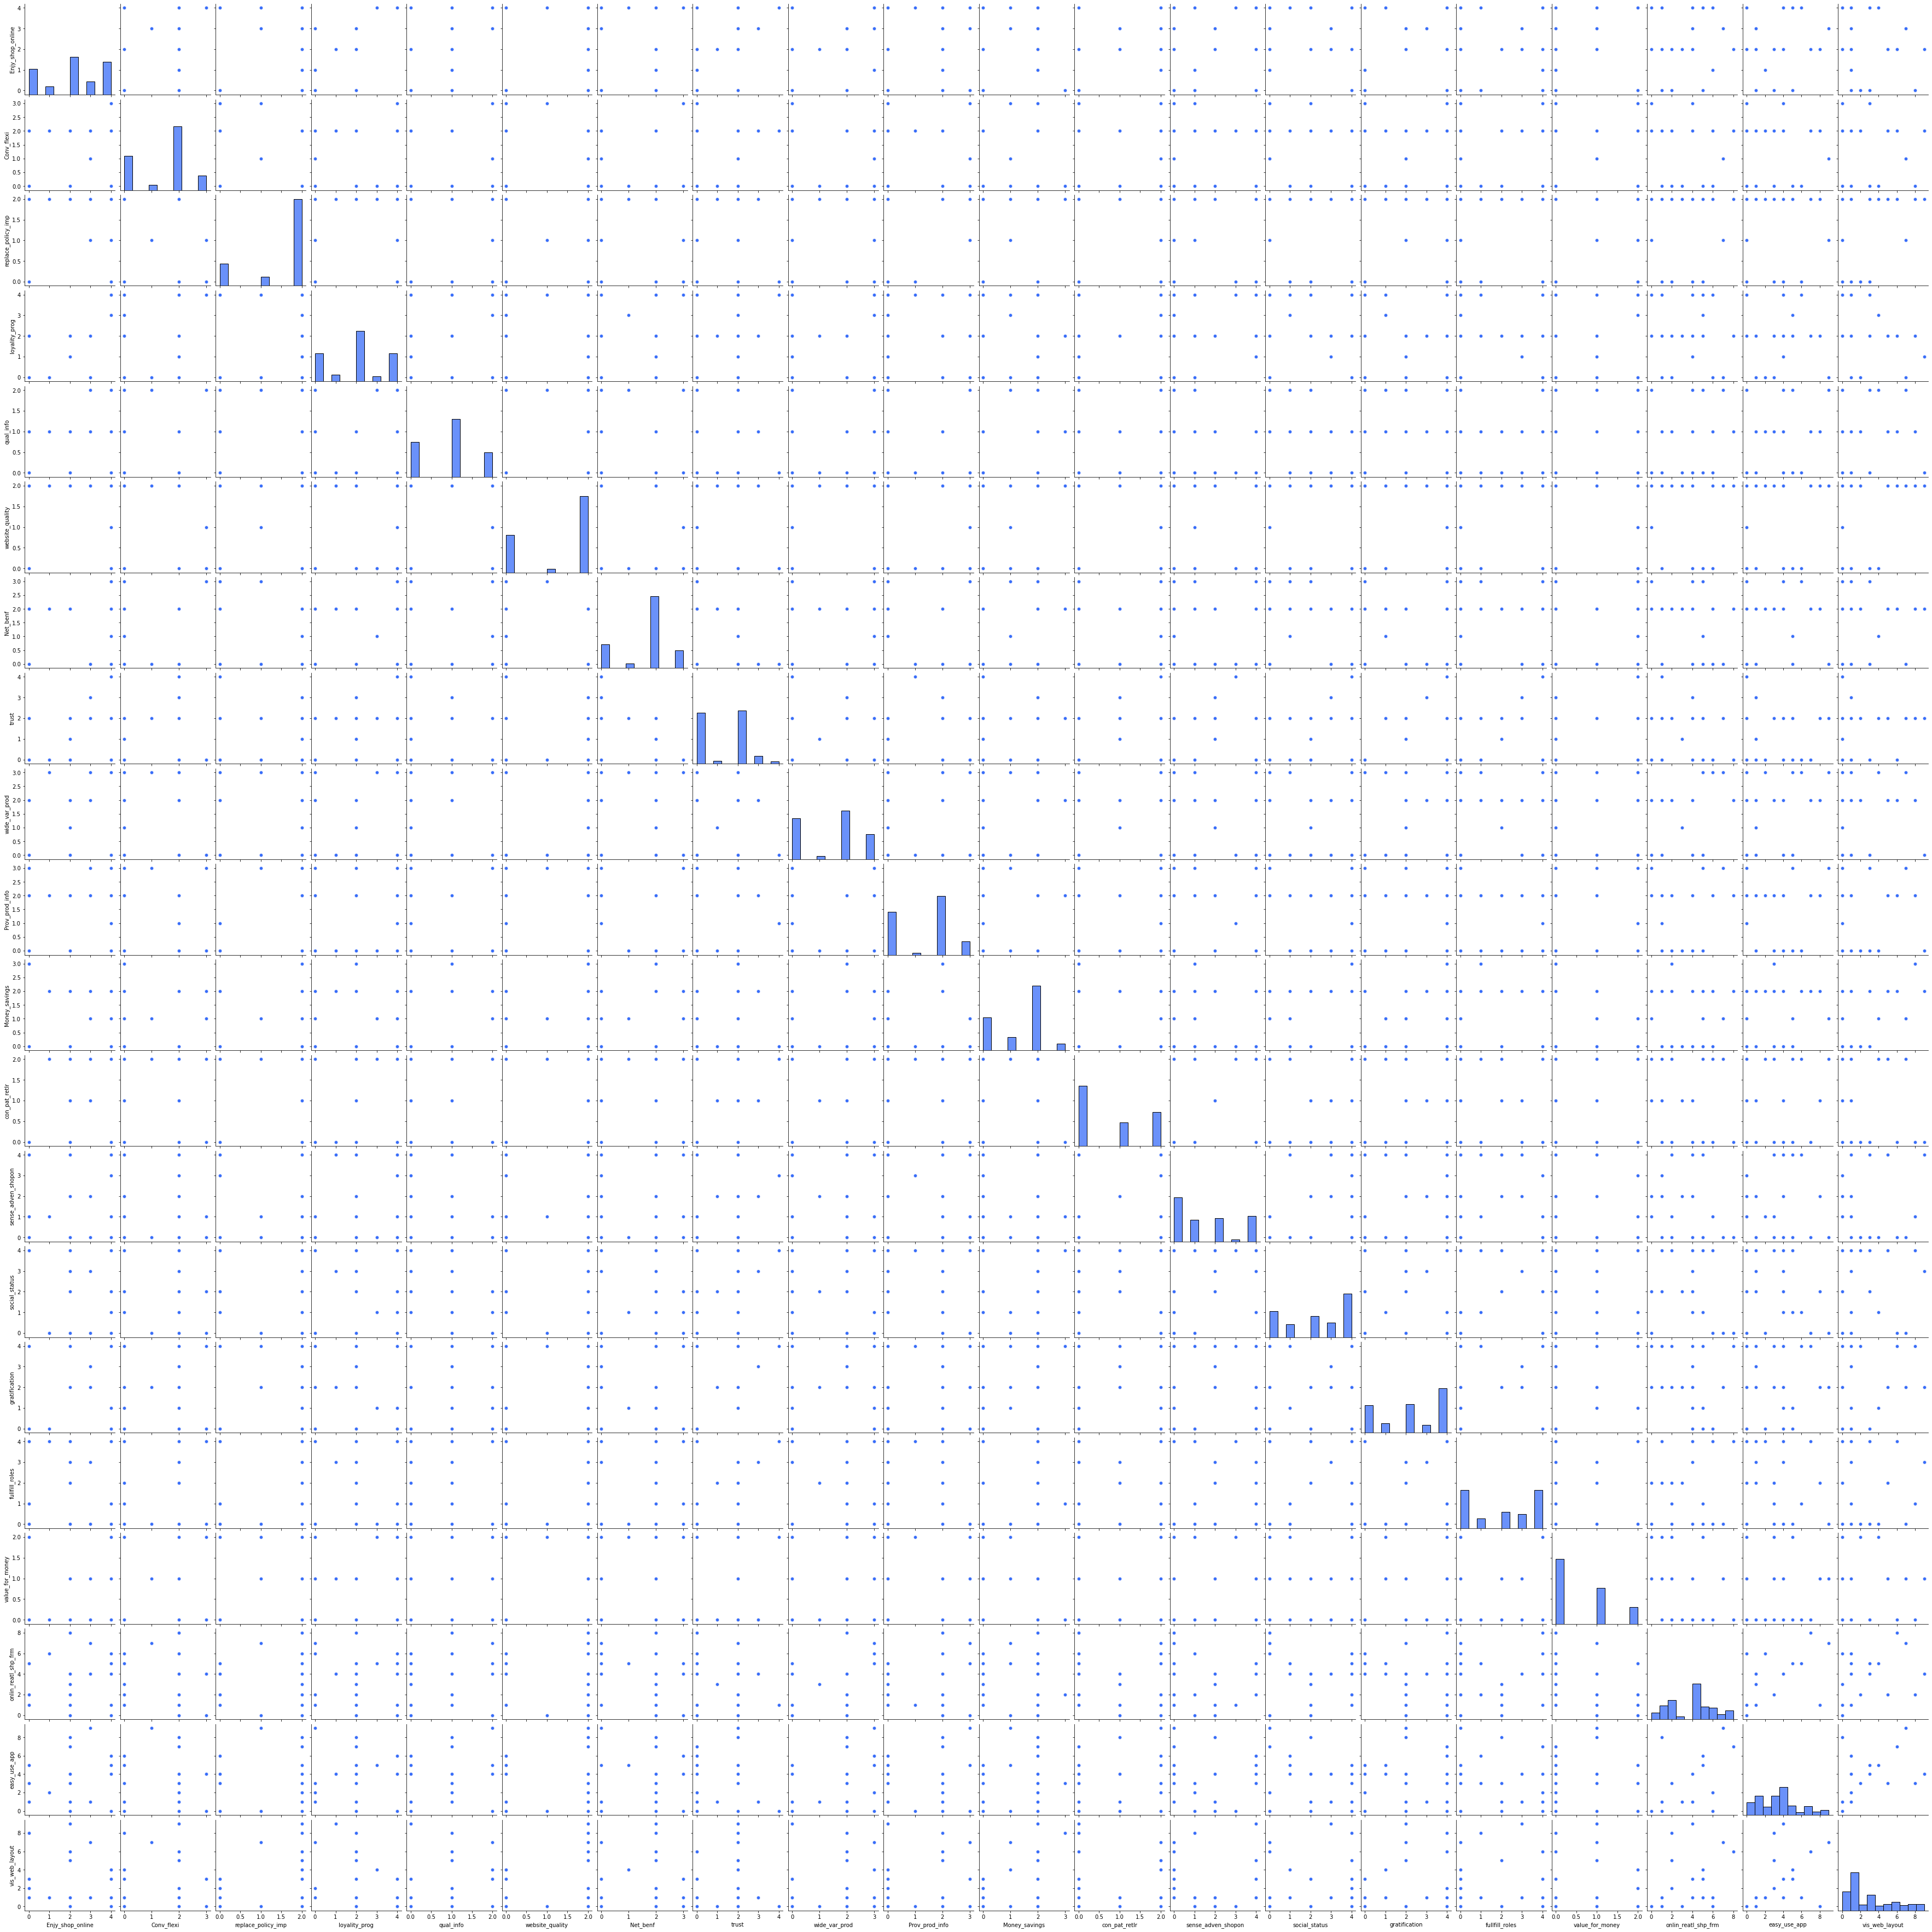

In [61]:
# Plot the next 10 columns
cols_to_plot = df_encoded.columns[30:50].tolist()
sns.set_palette('rainbow')
sns.pairplot(df_encoded,vars=cols_to_plot)

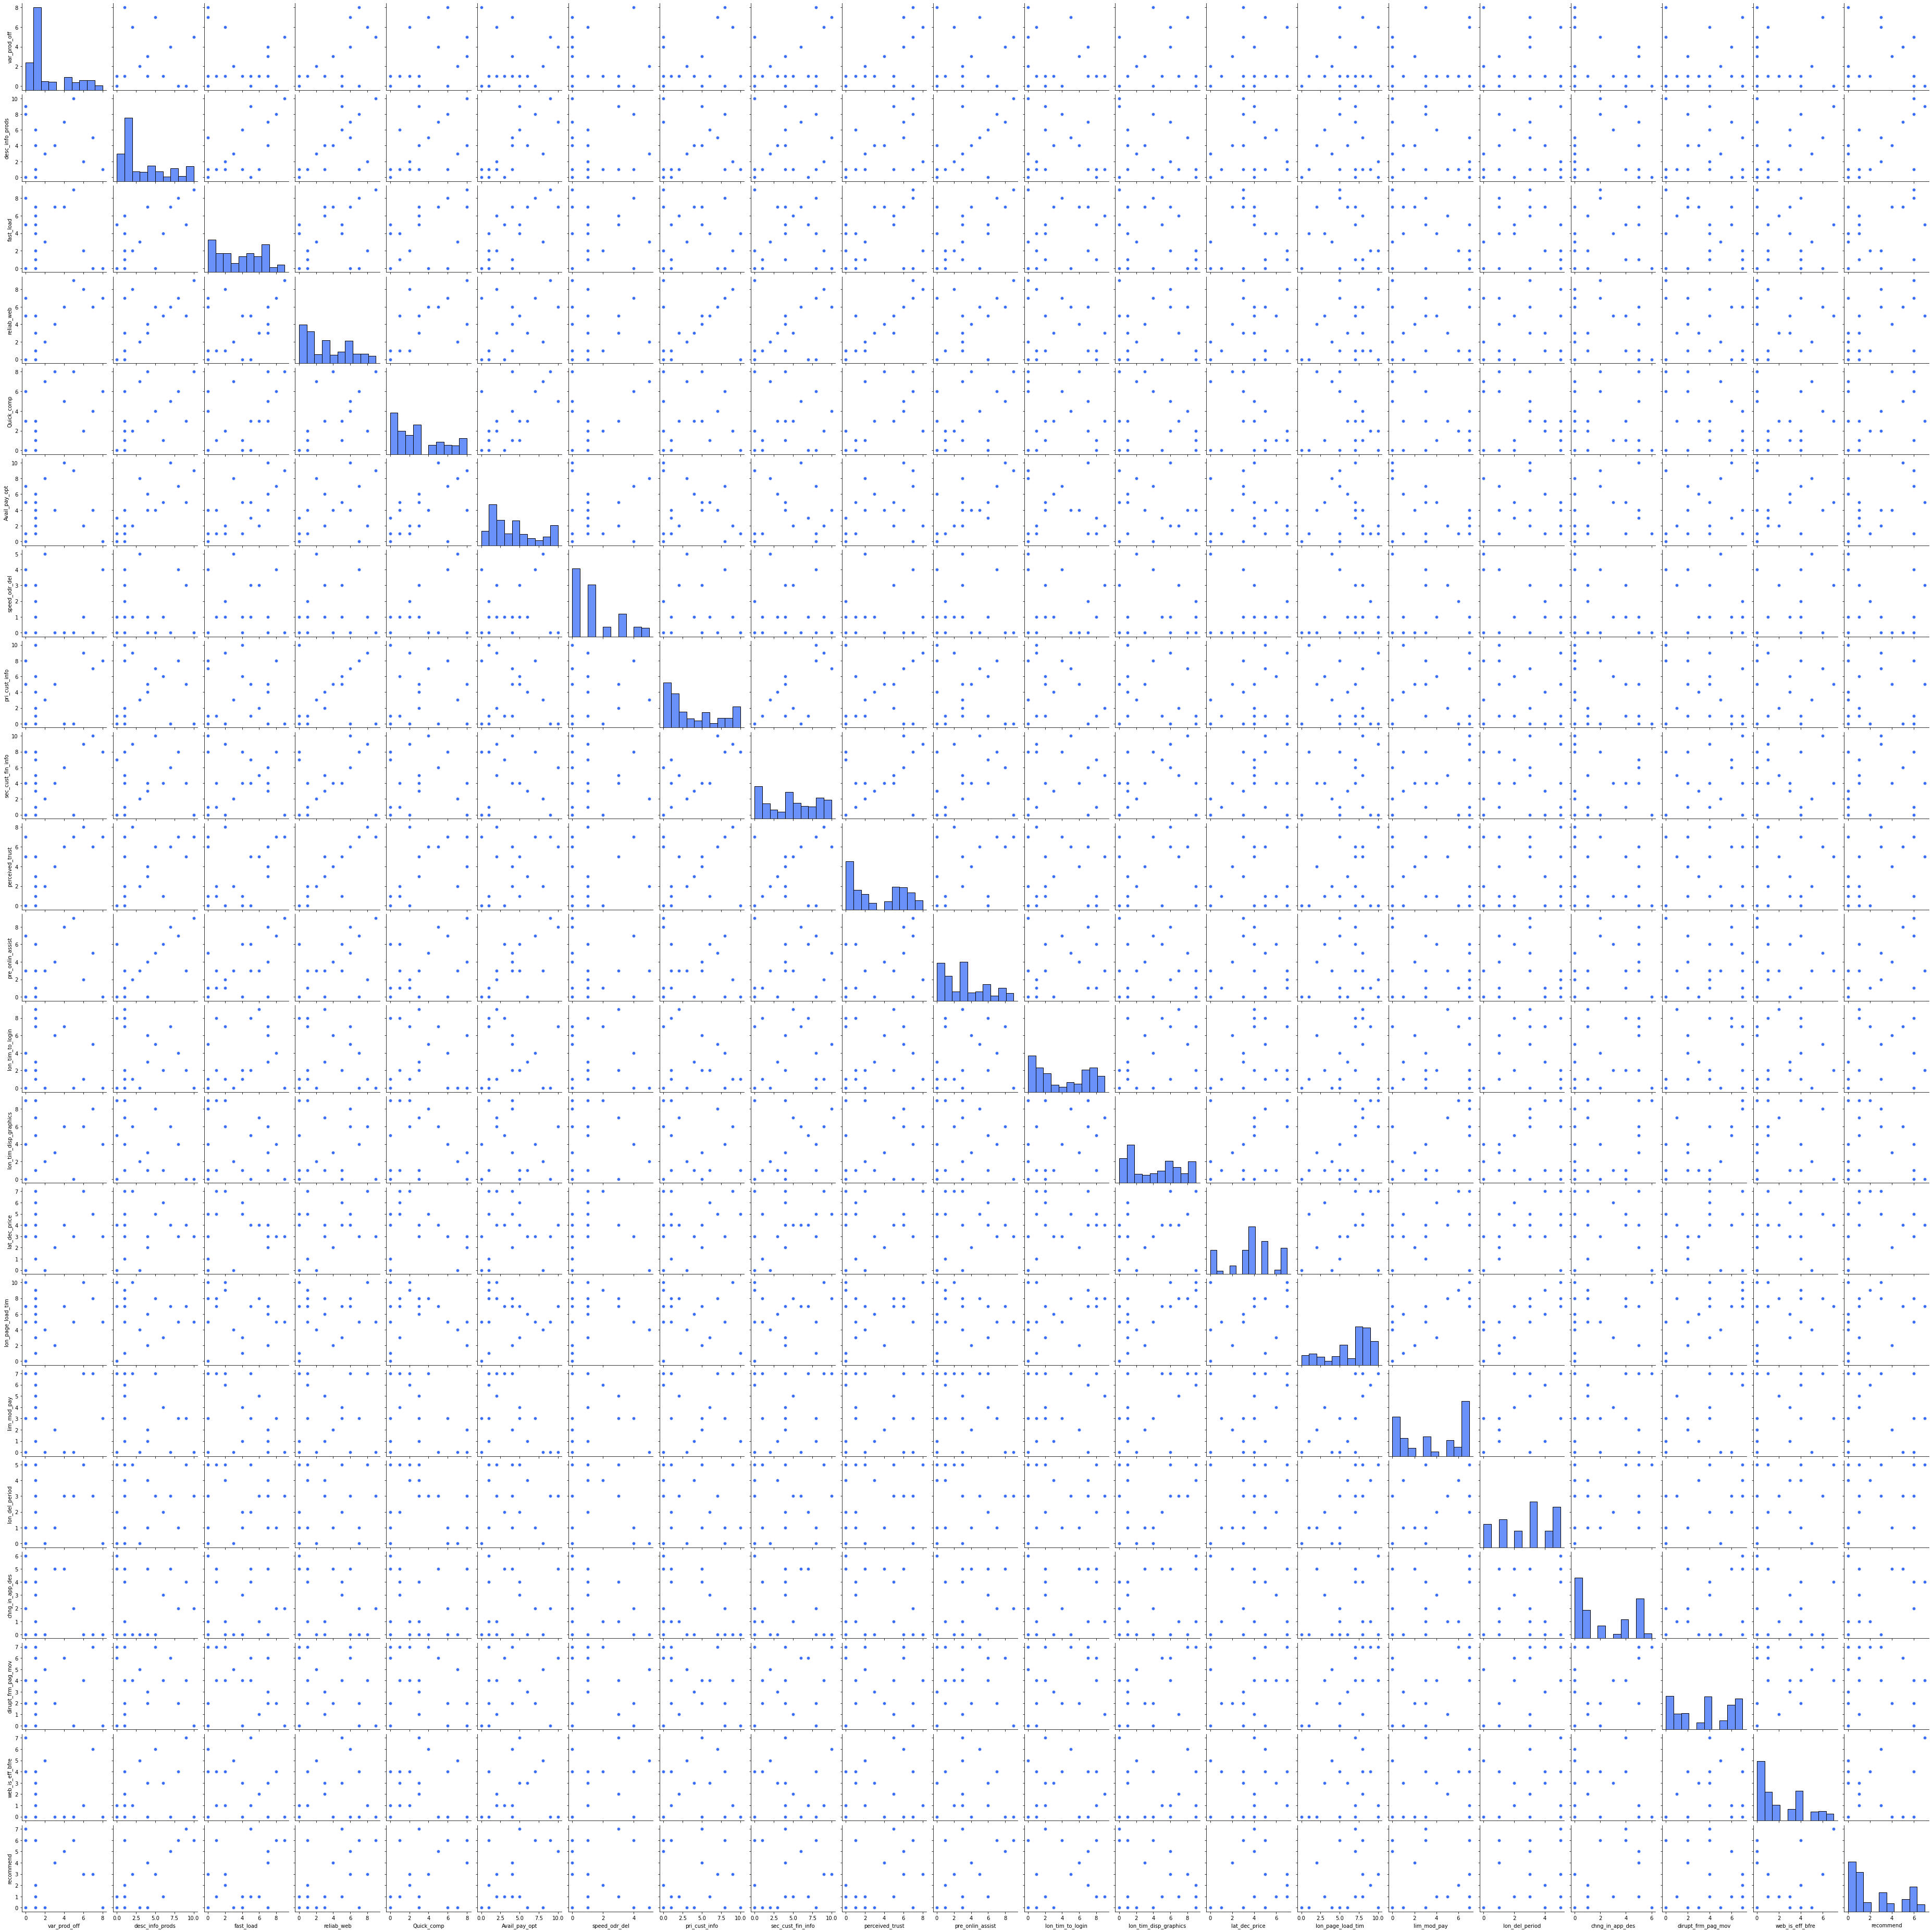

In [62]:
# Plot the next 10 columns
cols_to_plot = df_encoded.columns[50:71].tolist()
sns.set_palette('rainbow')
sns.pairplot(df_encoded,vars=cols_to_plot)

## Checking outliers

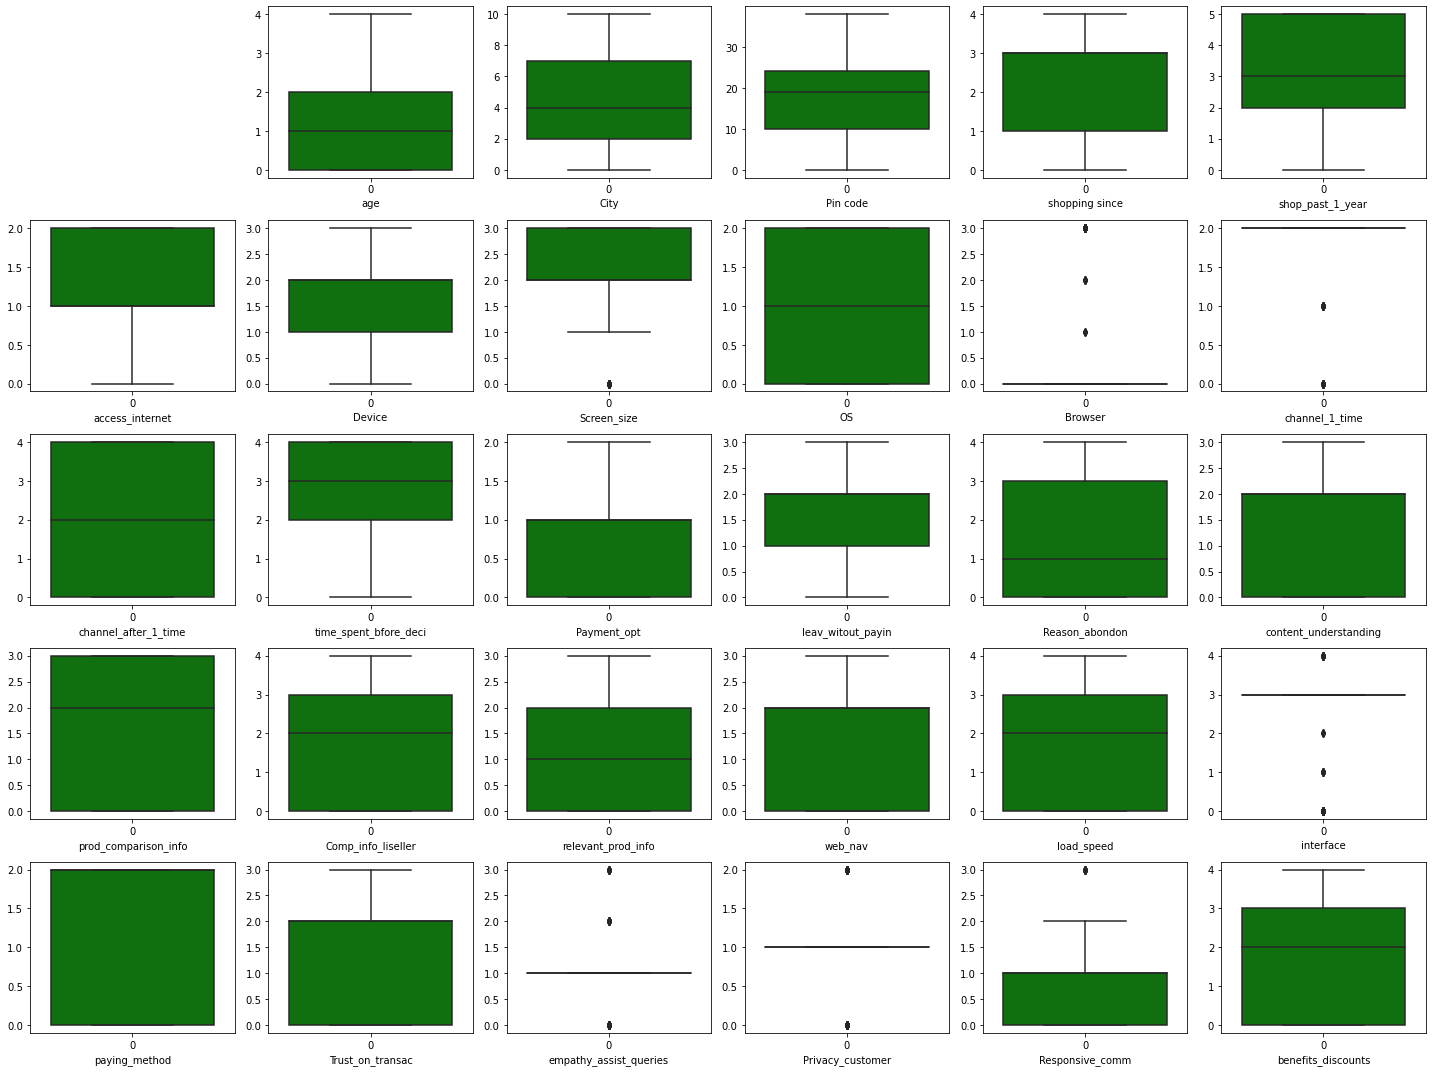

In [75]:
collist=df_encoded.columns[0:30].tolist()

plt.figure(figsize=(20,15))
for i in range(1,30):
    plt.subplot(5,6,i+1)
    sns.boxplot(data=df_encoded[collist[i]],color='green',orient='v').set(xlabel=collist[i])
    plt.tight_layout()

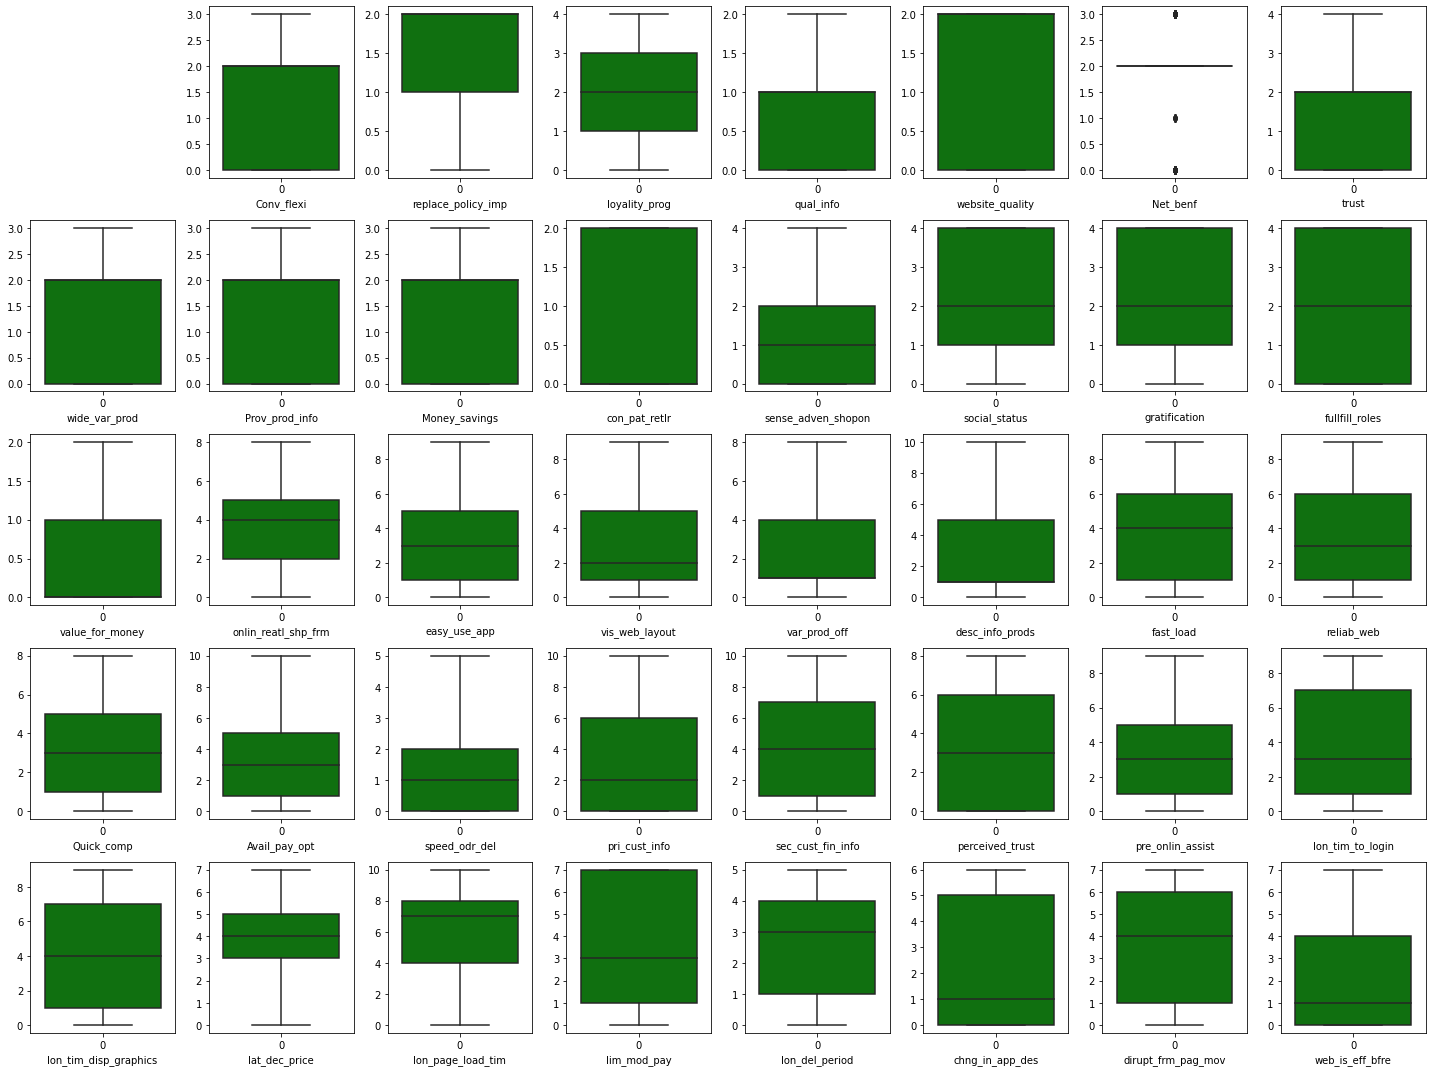

In [76]:
collist=df_encoded.columns[30:70].tolist()

plt.figure(figsize=(20,15))
for i in range(1,40):
    plt.subplot(5,8,i+1)
    sns.boxplot(data=df_encoded[collist[i]],color='green',orient='v').set(xlabel=collist[i])
    plt.tight_layout()

### Checking Skewness

In [77]:
df_encoded.head()

,Gender,age,City,Pin code,shopping since,shop_past_1_year,access_internet,Device,Screen_size,OS,Browser,channel_1_time,channel_after_1_time,time_spent_bfore_deci,Payment_opt,leav_witout_payin,Reason_abondon,content_understanding,prod_comparison_info,Comp_info_liseller,relevant_prod_info,web_nav,load_speed,interface,paying_method,Trust_on_transac,empathy_assist_queries,Privacy_customer,Responsive_comm,benefits_discounts,Enjy_shop_online,Conv_flexi,replace_policy_imp,loyality_prog,qual_info,website_quality,Net_benf,trust,wide_var_prod,Prov_prod_info,Money_savings,con_pat_retlr,sense_adven_shopon,social_status,gratification,fullfill_roles,value_for_money,onlin_reatl_shp_frm,easy_use_app,vis_web_layout,var_prod_off,desc_info_prods,fast_load,reliab_web,Quick_comp,Avail_pay_opt,speed_odr_del,pri_cust_info,sec_cust_fin_info,perceived_trust,pre_onlin_assist,lon_tim_to_login,lon_tim_disp_graphics,lat_dec_price,lon_page_load_tim,lim_mod_pay,lon_del_period,chng_in_app_des,dirupt_frm_pag_mov,web_is_eff_bfre,recommend
0,1,1,2,1,3,2,0,0,3,2,0,2,2,2,2,2,2,0,2,2,0,0,4,1,1,1,1,0,0,4,3,1,1,0,2,2,0,2,3,3,1,2,0,0,2,0,1,7,9,7,5,10,9,9,8,9,0,0,0,7,9,0,0,3,5,0,3,2,0,0,6
1,0,0,2,5,3,3,2,2,0,1,0,2,4,4,1,3,4,2,3,3,2,2,3,3,2,2,1,1,1,2,2,2,2,2,1,2,2,2,2,2,2,2,4,4,2,2,1,2,3,5,6,2,2,8,2,2,1,9,9,8,2,1,6,7,10,7,5,0,4,1,3
2,0,0,4,23,2,3,1,2,2,0,0,2,4,1,2,2,4,2,0,0,0,0,0,3,2,2,1,1,1,2,2,2,2,2,1,2,2,0,2,2,2,0,0,0,4,4,0,8,7,6,4,7,7,6,5,10,0,0,6,6,8,7,6,4,7,0,3,5,6,0,5
3,1,0,6,11,2,5,1,2,2,1,3,2,2,2,1,1,0,0,0,2,0,2,0,3,2,0,1,1,0,0,4,3,0,4,2,0,3,0,0,0,2,0,0,2,0,4,0,4,4,3,1,1,6,3,3,2,3,2,5,5,3,9,7,4,8,5,3,1,1,2,1
4,0,0,0,31,1,0,2,2,0,1,3,0,4,4,1,0,0,2,2,2,0,0,3,3,2,0,1,0,1,2,2,2,2,1,0,2,2,2,0,0,2,0,4,3,2,3,1,4,4,9,7,5,0,6,4,4,0,7,10,6,5,5,8,5,8,7,3,0,7,6,3


In [78]:
df_encoded.shape

(269, 71)

In [79]:
df_encoded.skew()

Gender                    0.741028
age                       0.680987
City                      0.313729
Pin code                  0.114537
shopping since           -0.276968
shop_past_1_year         -0.421739
access_internet           0.630053
Device                   -0.485180
Screen_size              -1.308503
OS                       -0.270283
Browser                   1.710244
channel_1_time           -2.469485
channel_after_1_time     -0.041161
time_spent_bfore_deci    -0.390691
Payment_opt               0.129735
leav_witout_payin        -0.867449
Reason_abondon            0.743052
content_understanding    -0.570717
prod_comparison_info     -0.277821
Comp_info_liseller       -0.006110
relevant_prod_info        0.243767
web_nav                  -0.207732
load_speed               -0.012294
interface                -1.270908
paying_method            -0.613621
Trust_on_transac         -0.320567
empathy_assist_queries    1.105678
Privacy_customer         -0.067247
Responsive_comm     